# Revisión inicial

In [356]:
# Cargo las librerias 
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
import itertools
from collections import Counter

In [357]:
# Establecemos nuestro escritorio de trabajo
os.chdir('C:\\Users\\angel\\OneDrive - Universidad Complutense de Madrid (UCM)\\Documentos Compartidos\\Master\\MineriaDeDatos\\Parte1\\Tarea')

In [358]:
import FuncionesMineria as fm

In [359]:
# Cargo los datos
datos = pd.read_excel('DatosEleccionesEspaña.xlsx')

In [360]:
# Comprobamos el tipo de formato de las variables variable que se ha asignado en la lectura.
# No todas las categoricas estan como queremos
datos.dtypes

Name                             object
CodigoProvincia                   int64
CCAA                             object
Population                        int64
TotalCensus                       int64
AbstentionPtge                  float64
AbstencionAlta                    int64
Izda_Pct                        float64
Dcha_Pct                        float64
Otros_Pct                       float64
Izquierda                         int64
Derecha                           int64
Age_0-4_Ptge                    float64
Age_under19_Ptge                float64
Age_19_65_pct                   float64
Age_over65_pct                  float64
WomanPopulationPtge             float64
ForeignersPtge                  float64
SameComAutonPtge                float64
SameComAutonDiffProvPtge        float64
DifComAutonPtge                 float64
UnemployLess25_Ptge             float64
Unemploy25_40_Ptge              float64
UnemployMore40_Ptge             float64
AgricultureUnemploymentPtge     float64


In [361]:
# Genera una lista con los nombres de las variables.
variables = list(datos.columns)

In [362]:
# Comprobamos el número de valores distintos en cada variable
fm.cuentaDistintos(datos)

Columna  Distintos
0                CodigoProvincia         52
1                     Population       3597
2                    TotalCensus       3310
3                 AbstentionPtge       5675
4                 AbstencionAlta          2
5                       Izda_Pct       6569
6                       Dcha_Pct       6682
7                      Otros_Pct       4319
8                      Izquierda          2
9                        Derecha          2
10                  Age_0-4_Ptge       3761
11              Age_under19_Ptge       5891
12                 Age_19_65_pct       6215
13                Age_over65_pct       6778
14           WomanPopulationPtge       4524
15                ForeignersPtge       2329
16              SameComAutonPtge       6151
17      SameComAutonDiffProvPtge       4207
18               DifComAutonPtge       5574
19           UnemployLess25_Ptge       2342
20            Unemploy25_40_Ptge       2681
21           UnemployMore40_Ptge       2751
22   AgricultureUnemploymentPtge       2525
23      IndustryUnemploymentPtge       2538
24  ConstructionUnemploymentPtge       2505
25      ServicesUnemploymentPtge       2904
26                 totalEmpresas       1226
27                     Industria        308
28                  Construccion        457
29           ComercTTEHosteleria        803
30                     Servicios        758
31                     inmuebles       3088
32                       Pob2010       3625
33                    SUPERFICIE       8110
34                 PobChange_pct       3049
35              PersonasInmueble        283
36                 Explotaciones        758

In [363]:
# Indico las categóricas que aparecen como numéricas
numericasAcategoricas = ['CodigoProvincia','AbstencionAlta','Izquierda','Derecha']

In [364]:
# Las transformo en categóricas
for var in numericasAcategoricas:
    datos[var] = datos[var].astype(str)

In [365]:
# Seleccionar las columnas numéricas del DataFrame
numericas = datos.select_dtypes(include=['int', 'int32', 'int64','float', 'float32', 'float64']).columns.to_list()

In [366]:
# Seleccionar las columnas categóricas del DataFrame
categoricas = [variable for variable in variables if variable not in numericas]

In [367]:
# Comprobamos que todas las variables tienen el formato que queremos  
datos.dtypes

Name                             object
CodigoProvincia                  object
CCAA                             object
Population                        int64
TotalCensus                       int64
AbstentionPtge                  float64
AbstencionAlta                   object
Izda_Pct                        float64
Dcha_Pct                        float64
Otros_Pct                       float64
Izquierda                        object
Derecha                          object
Age_0-4_Ptge                    float64
Age_under19_Ptge                float64
Age_19_65_pct                   float64
Age_over65_pct                  float64
WomanPopulationPtge             float64
ForeignersPtge                  float64
SameComAutonPtge                float64
SameComAutonDiffProvPtge        float64
DifComAutonPtge                 float64
UnemployLess25_Ptge             float64
Unemploy25_40_Ptge              float64
UnemployMore40_Ptge             float64
AgricultureUnemploymentPtge     float64


In [368]:
# Frecuencias de los valores en las variables categóricas
fm.analizar_variables_categoricas(datos)

{'Name':                    n         %
 La Zarza           2  0.000246
 Sada               2  0.000246
 Castejón           2  0.000246
 Moya               2  0.000246
 Rebollar           2  0.000246
 ...               ..       ...
 Navia de Suarna    1  0.000123
 Muras              1  0.000123
 Monterroso         1  0.000123
 Monforte de Lemos  1  0.000123
 Zuñeda             1  0.000123
 
 [8102 rows x 2 columns],
 'CodigoProvincia':       n         %
 9   371  0.045695
 37  362  0.044587
 8   311  0.038305
 50  293  0.036088
 19  288  0.035472
 31  272  0.033502
 46  266  0.032763
 5   248  0.030546
 49  248  0.030546
 16  238  0.029314
 44  236  0.029068
 25  231  0.028452
 47  225  0.027713
 10  222  0.027343
 17  221  0.027220
 24  211  0.025988
 40  209  0.025742
 45  204  0.025126
 22  202  0.024880
 34  191  0.023525
 43  184  0.022663
 42  183  0.022540
 28  179  0.022047
 26  174  0.021431
 18  170  0.020939
 6   165  0.020323
 3   141  0.017367
 12  135  0.016628
 48  112  

In [369]:
# Cuenta el número de valores distintos de cada una de las variables numéricas de un DataFrame
fm.cuentaDistintos(datos)

Columna  Distintos
0                     Population       3597
1                    TotalCensus       3310
2                 AbstentionPtge       5675
3                       Izda_Pct       6569
4                       Dcha_Pct       6682
5                      Otros_Pct       4319
6                   Age_0-4_Ptge       3761
7               Age_under19_Ptge       5891
8                  Age_19_65_pct       6215
9                 Age_over65_pct       6778
10           WomanPopulationPtge       4524
11                ForeignersPtge       2329
12              SameComAutonPtge       6151
13      SameComAutonDiffProvPtge       4207
14               DifComAutonPtge       5574
15           UnemployLess25_Ptge       2342
16            Unemploy25_40_Ptge       2681
17           UnemployMore40_Ptge       2751
18   AgricultureUnemploymentPtge       2525
19      IndustryUnemploymentPtge       2538
20  ConstructionUnemploymentPtge       2505
21      ServicesUnemploymentPtge       2904
22                 totalEmpresas       1226
23                     Industria        308
24                  Construccion        457
25           ComercTTEHosteleria        803
26                     Servicios        758
27                     inmuebles       3088
28                       Pob2010       3625
29                    SUPERFICIE       8110
30                 PobChange_pct       3049
31              PersonasInmueble        283
32                 Explotaciones        758

In [370]:
# Descriptivos variables numéricas mediante función describe() de Python
descriptivos_num = datos.describe().T

In [371]:
# Añadimos más descriptivos a los anteriores
for num in numericas:
    descriptivos_num.loc[num, "Asimetria"] = datos[num].skew()
    descriptivos_num.loc[num, "Kurtosis"] = datos[num].kurtosis()
    descriptivos_num.loc[num, "Mediana"] = datos[num].median()
    descriptivos_num.loc[num, "Rango"] = np.ptp(datos[num].dropna().values)

In [372]:
# Muestra valores perdidos
datos[variables].isna().sum()

Name                              0
CodigoProvincia                   0
CCAA                              0
Population                        0
TotalCensus                       0
AbstentionPtge                    0
AbstencionAlta                    0
Izda_Pct                          0
Dcha_Pct                          0
Otros_Pct                         0
Izquierda                         0
Derecha                           0
Age_0-4_Ptge                      0
Age_under19_Ptge                  0
Age_19_65_pct                     0
Age_over65_pct                    0
WomanPopulationPtge               0
ForeignersPtge                    0
SameComAutonPtge                  0
SameComAutonDiffProvPtge          0
DifComAutonPtge                   0
UnemployLess25_Ptge               0
Unemploy25_40_Ptge                0
UnemployMore40_Ptge               0
AgricultureUnemploymentPtge       0
IndustryUnemploymentPtge          0
ConstructionUnemploymentPtge      0
ServicesUnemploymentPtge    

# Comenzamos la depuración de los datos

In [373]:
# A veces los 'nan' vienen como como una cadena de caracteres, los modificamos a perdidos.
for x in categoricas:
    datos[x] = datos[x].replace('nan', np.nan) 

In [374]:
# Missings no declarados variables cualitativas (NSNC, ?)
datos['Densidad'] = datos['Densidad'].replace('?', np.nan)

In [378]:
datos[datos['Explotaciones'] > 9000]

Name CodigoProvincia          CCAA  Population  \
6                  Alagón del Río              10   Extremadura         923   
107                     La Granja              10   Extremadura         357   
151                    Portezuelo              10   Extremadura         246   
183                        Tiétar              10   Extremadura         940   
202                  Valdemorales              10   Extremadura         198   
...                           ...             ...           ...         ...   
7996       Riocavado de la Sierra               9  CastillaLeón          59   
8047          Tórtoles de Esgueva               9  CastillaLeón         498   
8049                  Trespaderne               9  CastillaLeón         877   
8053                   Vadocondes               9  CastillaLeón         382   
8100  Villaquirán de los Infantes               9  CastillaLeón         146   

      TotalCensus  AbstentionPtge AbstencionAlta  Izda_Pct  Dcha_Pct  \
6             826          30.024              1    59.343    37.890   
107           320          25.625              0    36.555    60.504   
151           207          20.290              0    46.060    52.121   
183           745          31.946              1    44.970    52.071   
202           173          17.919              0    48.591    49.296   
...           ...             ...            ...       ...       ...   
7996           61          32.787              1    41.463    56.097   
8047          361          26.870              0    31.060    64.772   
8049          715          25.455              0    44.653    50.094   
8053          317          22.082              0    53.442    44.939   
8100          130          25.385              0    40.207    58.762   

      Otros_Pct  ... ComercTTEHosteleria Servicios  ActividadPpal  inmuebles  \
6         0.692  ...                 0.0       0.0           Otro      423.0   
107       0.420  ...                 0.0       0.0           Otro      267.0   
151       0.000  ...                 0.0       0.0           Otro      270.0   
183       0.789  ...                 NaN       NaN           Otro        NaN   
202       0.704  ...                 0.0       0.0           Otro      203.0   
...         ...  ...                 ...       ...            ...        ...   
7996      2.439  ...                 0.0       0.0           Otro      102.0   
8047      2.652  ...                 0.0       0.0           Otro      459.0   
8049      2.439  ...                 0.0       0.0           Otro     1683.0   
8053      0.405  ...                 0.0       0.0           Otro      402.0   
8100      0.000  ...                 0.0       0.0           Otro      127.0   

      Pob2010  SUPERFICIE  Densidad  PobChange_pct  PersonasInmueble  \
6       879.0   1429.1900   MuyBaja           5.01              2.18   
107     366.0   1494.4357   MuyBaja          -2.46              1.34   
151     262.0  12610.5354   MuyBaja          -6.11              0.91   
183       NaN  47959.3300   MuyBaja            NaN               NaN   
202     233.0    995.2400   MuyBaja         -15.02              0.98   
...       ...         ...       ...            ...               ...   
7996     59.0   4331.6400   MuyBaja           0.00              0.58   
8047    490.0   7920.0021   MuyBaja           1.63              1.08   
8049   1099.0   3681.1590   MuyBaja         -20.20              0.52   
8053    416.0   2569.0985   MuyBaja          -8.17              0.95   
8100    162.0   1297.5722   MuyBaja          -9.88              1.15   

      Explotaciones  
6             99999  
107           99999  
151           99999  
183           99999  
202           99999  
...             ...  
7996          99999  
8047          99999  
8049          99999  
8053          99999  
8100          99999  

[189 rows x 41 columns]

In [379]:
# Missings no declarados variables cuantitativas (-1, 99999)
datos['Explotaciones'] = datos['Explotaciones'].replace(99999, np.nan)

In [380]:
# Valores fuera de rango
datos['SameComAutonPtge'] = [x if 0 <= x <= 100 else np.nan for x in datos['SameComAutonPtge']]

In [381]:
# Valores fuera de rango
datos['ForeignersPtge'] = [x if 0 <= x <= 100 else np.nan for x in datos['ForeignersPtge']]

In [382]:
# Valores fuera de rango
datos['Age_19_65_pct'] = [x if 0 <= x <= 100 else np.nan for x in datos['Age_19_65_pct']]

In [24]:
# Junto categorías poco representadas de las variables categóricas
datos['ActividadPpal'] = datos['ActividadPpal'].replace({'Servicios': 'ServConstInd', 
                                                         'Construccion': 'ServConstInd',
                                                         'Industria': 'ServConstInd'})

In [383]:
# Junto categorías poco representadas de las variables categóricas

# Vamos a agregar Ceuta & Melilla (51-52) a Canarias, Las Palmas (35), ya que al ser
# un valor tan pequeño, con el fin de no perderlo, lo agrego a un territorio español
# que tambien se encuentra en el Continente Africano

datos['CodigoProvincia'] = datos['CodigoProvincia'].replace({'51': '35-51-52', 
                                                             '52': '35-51-52',
                                                             '35': '35-51-52',})

In [384]:
# Junto categorías poco representadas de las variables categóricas
datos['CCAA'] = datos['CCAA'].replace({'Ceuta': 'Canarias, Cueta & Melilla', 
                                       'Melilla': 'Canarias, Cueta & Melilla',
                                       'Canarias': 'Canarias, Cueta & Melilla'})

In [385]:
# Indico las variables objetivo y las input (los atipicos y los missings se gestionan
# solo de las variables input)
varObjCont = datos['Dcha_Pct']
varObjBin = datos['Derecha']
datos_input = datos.drop(['Dcha_Pct', 'Derecha'], axis = 1)

In [386]:
# Eliminamos la variables que no han sido escogidas como objetivo
datos_input = datos_input.drop(['Izda_Pct', 'AbstentionPtge','Otros_Pct','AbstencionAlta','Izquierda','Name'], axis = 1)

In [387]:
# Genera una lista con los nombres de las variables del cojunto de datos input.
variables_input = list(datos_input.columns)  

In [388]:
# Selecionamos las variables numéricas
numericas_input = datos_input.select_dtypes(include = ['int', 'int32', 'int64','float',
                                                       'float32', 'float64']).columns.to_list()

In [389]:
# Selecionamos las variables categóricas
categoricas_input = [variable for variable in variables_input if variable not in numericas_input]

In [32]:
# La proporción de valores atípicos se calcula dividiendo la cantidad de valores atípicos por el número total de filas
resultados = {x: fm.atipicosAmissing(datos_input[x])[1] / len(datos_input) for x in numericas_input}

In [33]:
# Modifico los atipicos como missings
for x in numericas_input:
    datos_input[x] = fm.atipicosAmissing(datos_input[x])[0]

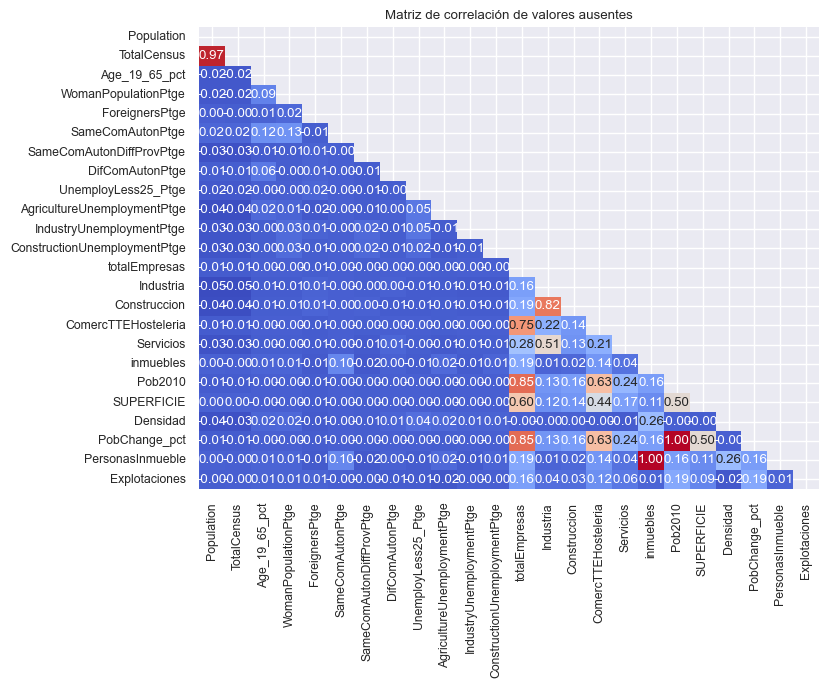

In [34]:
# Visualiza un mapa de calor que muestra la matriz de correlación de valores ausentes en el conjunto de datos.
fm.patron_perdidos(datos_input)

In [35]:
# Muestra total de valores perdidos por cada variable
datos_input[variables_input].isna().sum()

CodigoProvincia                   0
CCAA                              0
Population                      806
TotalCensus                     781
Age_0-4_Ptge                      0
Age_under19_Ptge                  0
Age_19_65_pct                    24
Age_over65_pct                    0
WomanPopulationPtge              21
ForeignersPtge                  653
SameComAutonPtge                  3
SameComAutonDiffProvPtge        165
DifComAutonPtge                  40
UnemployLess25_Ptge              26
Unemploy25_40_Ptge                0
UnemployMore40_Ptge               0
AgricultureUnemploymentPtge     162
IndustryUnemploymentPtge         48
ConstructionUnemploymentPtge     53
ServicesUnemploymentPtge          0
totalEmpresas                     5
Industria                       188
Construccion                    139
ComercTTEHosteleria               9
Servicios                        62
ActividadPpal                     0
inmuebles                       138
Pob2010                     

In [36]:
# Muestra proporción de valores perdidos por cada variable (guardo la información)
prop_missingsVars = datos_input.isna().sum()/len(datos_input)

In [37]:
# Creamos la variable prop_missings que recoge el número de valores perdidos por cada observación
datos_input['prop_missings'] = datos_input.isna().mean(axis = 1)

In [38]:
# Realizamos un estudio descriptivo básico a la nueva variable
datos_input['prop_missings'].describe()

count    8119.000000
mean        0.014052
std         0.025581
min         0.000000
25%         0.000000
50%         0.000000
75%         0.030303
max         0.333333
Name: prop_missings, dtype: float64

In [39]:
# Calculamos el número de valores distintos que tiene la nueva variable
len(datos_input['prop_missings'].unique())

8

In [40]:
# Elimino las observaciones con mas de la mitad de datos missings (no hay ninguna)
eliminar = datos_input['prop_missings'] > 0.5
datos_input = datos_input[~eliminar]
varObjBin = varObjBin[~eliminar]
varObjCont = varObjCont[~eliminar]

In [41]:
# Transformo la nueva variable en categórica (ya que tiene pocos valores diferentes)
datos_input["prop_missings"] = datos_input["prop_missings"].astype(str)

In [42]:
# Agrego 'prop_missings' a la lista de nombres de variables input
variables_input.append('prop_missings')
categoricas_input.append('prop_missings')

In [43]:
# Elimino las variables con mas de la mitad de datos missings (no hay ninguna)
eliminar = [prop_missingsVars.index[x] for x in range(len(prop_missingsVars)) if prop_missingsVars[x] > 0.5]
datos_input = datos_input.drop(eliminar, axis = 1)

# Imputaciones

In [44]:
# Imputo todas las cuantitativas, seleccionar el tipo de imputacion: media, mediana o aleatorio
for x in numericas_input:
    datos_input[x] = fm.ImputacionCuant(datos_input[x], 'mediana')

In [45]:
# Imputo todas las cualitativas, seleccionar el tipo de imputacion: moda o aleatorio
for x in categoricas_input:
    datos_input[x] = fm.ImputacionCuali(datos_input[x], 'aleatorio')

In [46]:
# Reviso que no queden datos missings
datos_input.isna().sum()

CodigoProvincia                 0
CCAA                            0
Population                      0
TotalCensus                     0
Age_0-4_Ptge                    0
Age_under19_Ptge                0
Age_19_65_pct                   0
Age_over65_pct                  0
WomanPopulationPtge             0
ForeignersPtge                  0
SameComAutonPtge                0
SameComAutonDiffProvPtge        0
DifComAutonPtge                 0
UnemployLess25_Ptge             0
Unemploy25_40_Ptge              0
UnemployMore40_Ptge             0
AgricultureUnemploymentPtge     0
IndustryUnemploymentPtge        0
ConstructionUnemploymentPtge    0
ServicesUnemploymentPtge        0
totalEmpresas                   0
Industria                       0
Construccion                    0
ComercTTEHosteleria             0
Servicios                       0
ActividadPpal                   0
inmuebles                       0
Pob2010                         0
SUPERFICIE                      0
Densidad      

In [47]:
# Frecuencias de los valores en las variables categóricas
fm.analizar_variables_categoricas(datos_input)

{'CodigoProvincia':             n         %
 9         371  0.045695
 37        362  0.044587
 8         311  0.038305
 50        293  0.036088
 19        288  0.035472
 31        272  0.033502
 46        266  0.032763
 5         248  0.030546
 49        248  0.030546
 16        238  0.029314
 44        236  0.029068
 25        231  0.028452
 47        225  0.027713
 10        222  0.027343
 17        221  0.027220
 24        211  0.025988
 40        209  0.025742
 45        204  0.025126
 22        202  0.024880
 34        191  0.023525
 43        184  0.022663
 42        183  0.022540
 28        179  0.022047
 26        174  0.021431
 18        170  0.020939
 6         165  0.020323
 3         141  0.017367
 12        135  0.016628
 48        112  0.013795
 41        105  0.012933
 13        102  0.012563
 4         102  0.012563
 39        102  0.012563
 29        101  0.012440
 23         97  0.011947
 15         93  0.011455
 32         92  0.011331
 20         88  0.010839
 2    

In [48]:
# Junto categorías poco representadas de la variable 'prop_missings'
# 1º Sabemos que todos los datos por lo menos estan completos en casi un 70%
# 2º Debido a que lo datos con una perdida por encima del 9% son muy pocos,
# vamos a unificarlos en uno solo para que sea más representativo
datos_input['prop_missings'] = datos_input['prop_missings'].replace({
    '0.09090909090909091': '+0.09', 
    '0.12121212121212122': '+0.09',
    '0.3333333333333333': '+0.09',
    '0.15151515151515152': '+0.09',
    '0.30303030303030304': '+0.09',
    })

In [49]:
# Genera una lista con los nombres de las variables.
variables = list(datos_input.columns)  

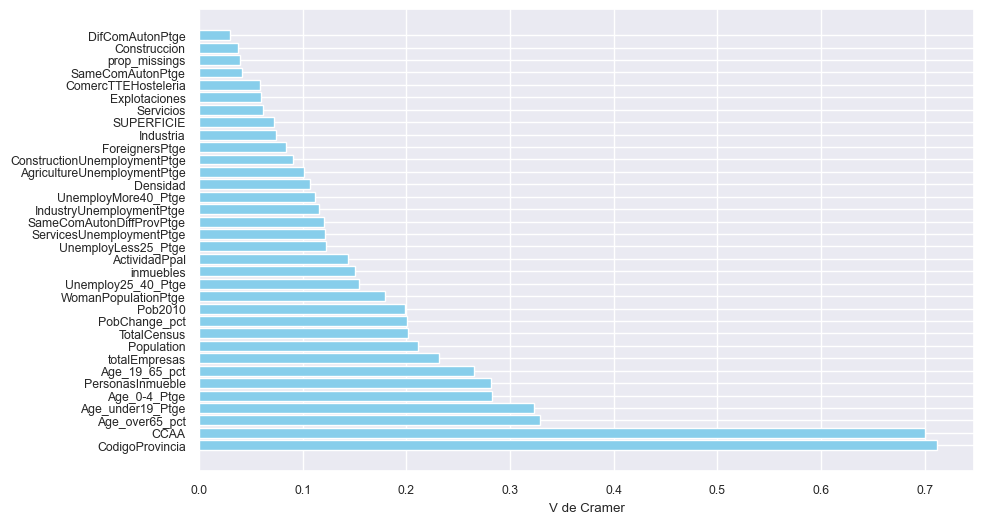

In [50]:
# Obtengo la importancia de las variables
fm.graficoVcramer(datos_input, varObjBin)

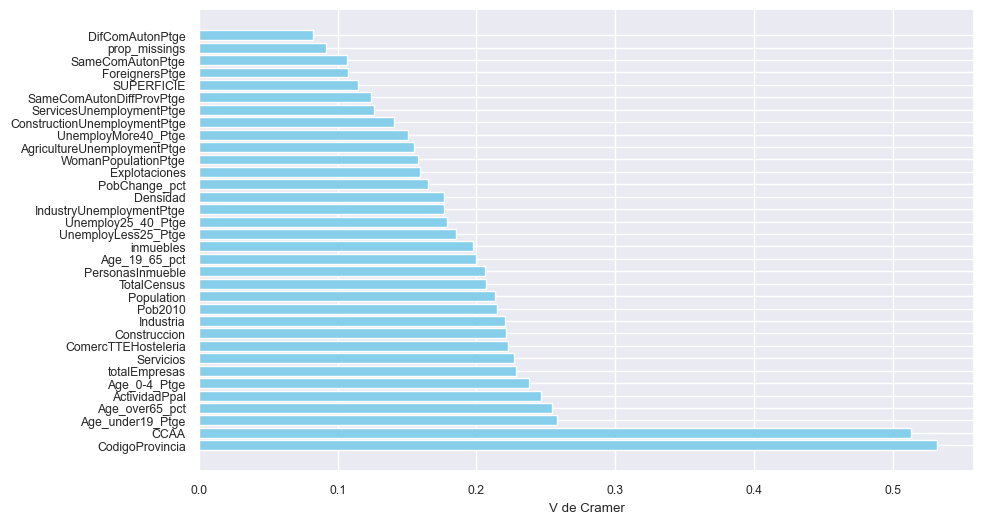

In [51]:
fm.graficoVcramer(datos_input, varObjCont)

In [52]:
# Crear un DataFrame para almacenar los resultados del coeficiente V de Cramer
VCramer = pd.DataFrame(columns=['Variable', 'Objetivo', 'Vcramer'])

for variable in variables:
    v_cramer = fm.Vcramer(datos_input[variable], varObjCont)
    # VCramer = VCramer.append({'Variable': variable, 'Objetivo': varObjBin.name, 'Vcramer': v_cramer},ignore_index=True)
    aux = pd.DataFrame({'Variable': [variable], 'Objetivo': [varObjCont.name], 'Vcramer': [v_cramer]})
    VCramer = pd.concat([VCramer, aux], ignore_index=True)

    
for variable in variables:
    v_cramer = fm.Vcramer(datos_input[variable], varObjBin)
    # VCramer = VCramer.append({'Variable': variable, 'Objetivo': varObjBin.name, 'Vcramer': v_cramer},ignore_index=True)
    aux = pd.DataFrame({'Variable': [variable], 'Objetivo': [varObjBin.name], 'Vcramer': [v_cramer]})
    VCramer = pd.concat([VCramer, aux], ignore_index=True)

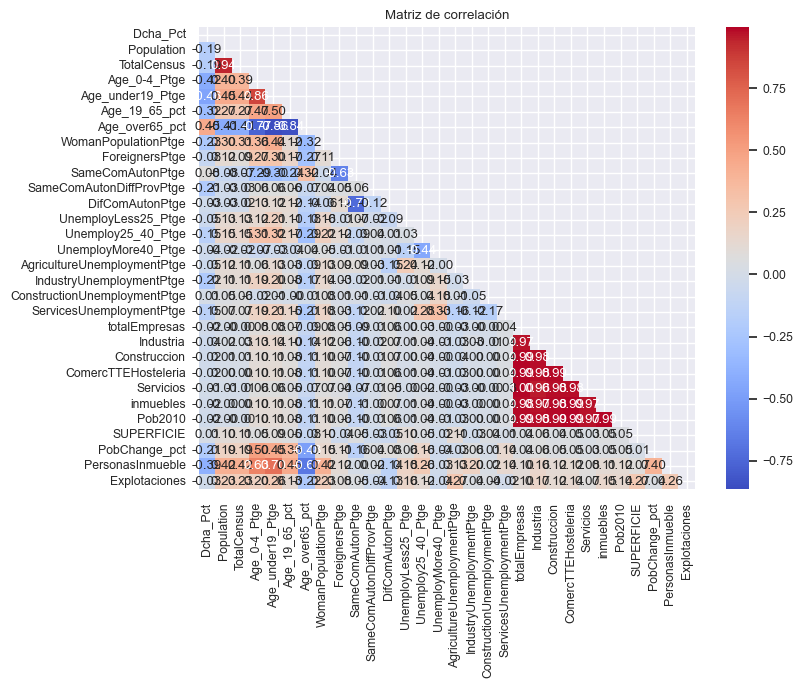

In [53]:
# Correlación entre todas las variables numéricas frente a la objetivo continua.
# Obtener las columnas numéricas del DataFrame 'datos_input'
numericas_graf = datos_input.select_dtypes(include=['int', 'float']).columns
# Calcular la matriz de correlación de Pearson entre la variable objetivo continua ('varObjCont') y las variables numéricas
matriz_corr = pd.concat([varObjCont, datos_input[numericas_graf]], axis = 1).corr(method = 'pearson')
# Crear una máscara para ocultar la mitad superior de la matriz de correlación (triangular superior)
mask = np.triu(np.ones_like(matriz_corr, dtype=bool))
# Crear una figura para el gráfico con un tamaño de 8x6 pulgadas
plt.figure(figsize=(8, 6))
# Establecer el tamaño de fuente en el gráfico
sns.set(font_scale=0.8)
# Crear un mapa de calor (heatmap) de la matriz de correlación
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt=".2f", cbar=True, mask=mask)
# Establecer el título del gráfico
plt.title("Matriz de correlación")
# Mostrar el gráfico de la matriz de correlación
plt.show()

In [54]:
# Busco las mejores transformaciones para las variables numericas con respesto a los dos tipos de variables
input_cont = pd.concat([datos_input, fm.Transf_Auto(datos_input[numericas_input], varObjCont)], axis = 1)
input_bin = pd.concat([datos_input, fm.Transf_Auto(datos_input[numericas_input], varObjBin)], axis = 1)

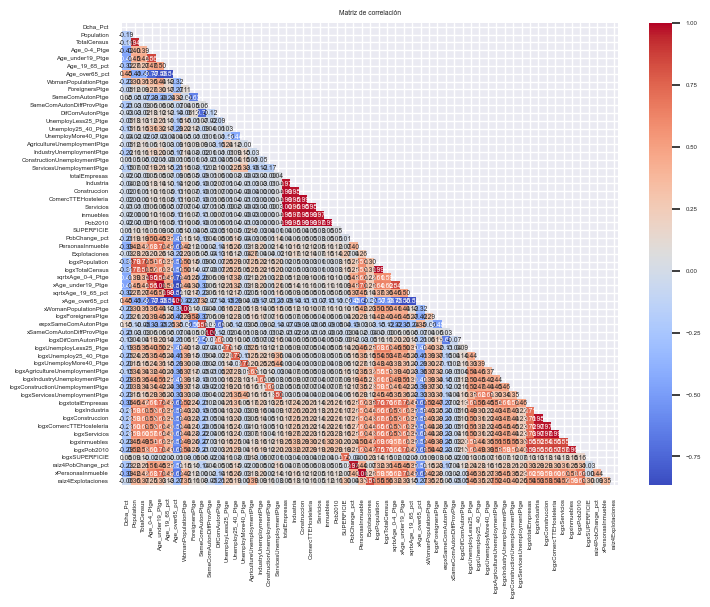

In [55]:
# Correlación entre todas las variables numéricas frente a la objetivo continua.
# Obtener las columnas numéricas del DataFrame 'datos_input'
numericas = input_cont.select_dtypes(include=['int', 'float']).columns
# Calcular la matriz de correlación de Pearson entre la variable objetivo continua ('varObjCont') y las variables numéricas
matriz_corr = pd.concat([varObjCont, input_cont[numericas]], axis = 1).corr(method = 'pearson')
# Crear una máscara para ocultar la mitad superior de la matriz de correlación (triangular superior)
mask = np.triu(np.ones_like(matriz_corr, dtype=bool))
# Crear una figura para el gráfico con un tamaño de 8x6 pulgadas
plt.figure(figsize=(8, 6))
# Establecer el tamaño de fuente en el gráfico
sns.set(font_scale=0.4)
# Crear un mapa de calor (heatmap) de la matriz de correlación
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt=".2f", cbar=True, mask=mask)
# Establecer el título del gráfico
plt.title("Matriz de correlación")
# Mostrar el gráfico de la matriz de correlación
plt.show()

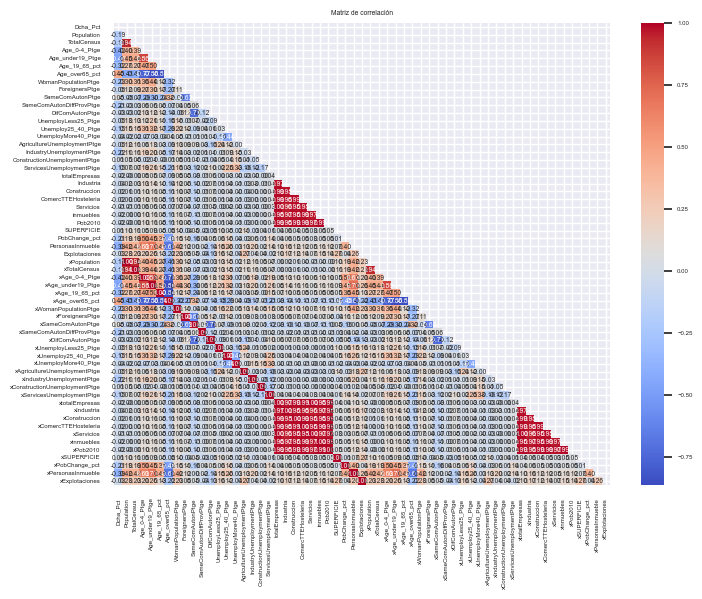

In [56]:
# Correlación entre todas las variables numéricas frente a la objetivo continua.
# Obtener las columnas numéricas del DataFrame 'datos_input'
numericas = input_bin.select_dtypes(include=['int', 'float']).columns
# Calcular la matriz de correlación de Pearson entre la variable objetivo continua ('varObjCont') y las variables numéricas
matriz_corr = pd.concat([varObjCont, input_bin[numericas]], axis = 1).corr(method = 'pearson')
# Crear una máscara para ocultar la mitad superior de la matriz de correlación (triangular superior)
mask = np.triu(np.ones_like(matriz_corr, dtype=bool))
# Crear una figura para el gráfico con un tamaño de 8x6 pulgadas
plt.figure(figsize=(8, 6))
# Establecer el tamaño de fuente en el gráfico
sns.set(font_scale=0.4)
# Crear un mapa de calor (heatmap) de la matriz de correlación
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt=".2f", cbar=True, mask=mask)
# Establecer el título del gráfico
plt.title("Matriz de correlación")
# Mostrar el gráfico de la matriz de correlación
plt.show()

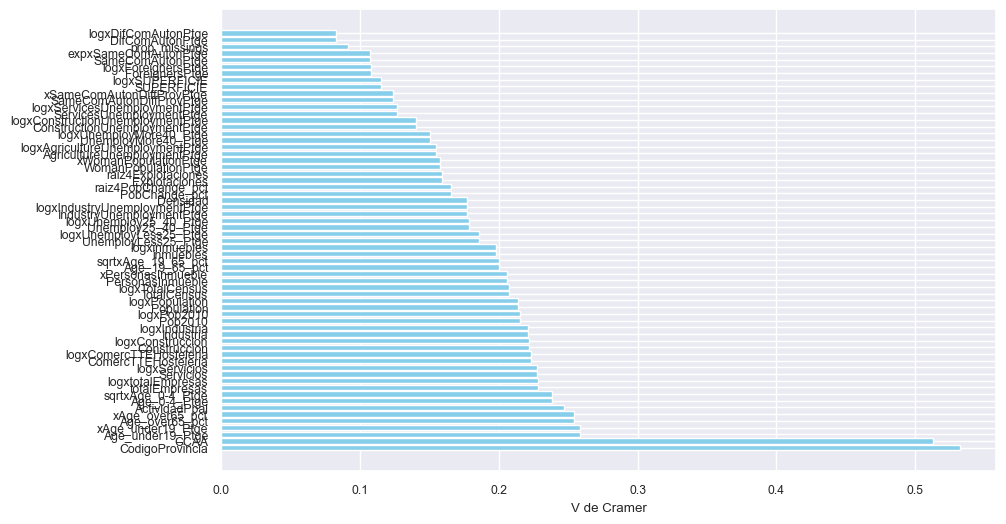

In [57]:
fm.graficoVcramer(input_cont, varObjCont)

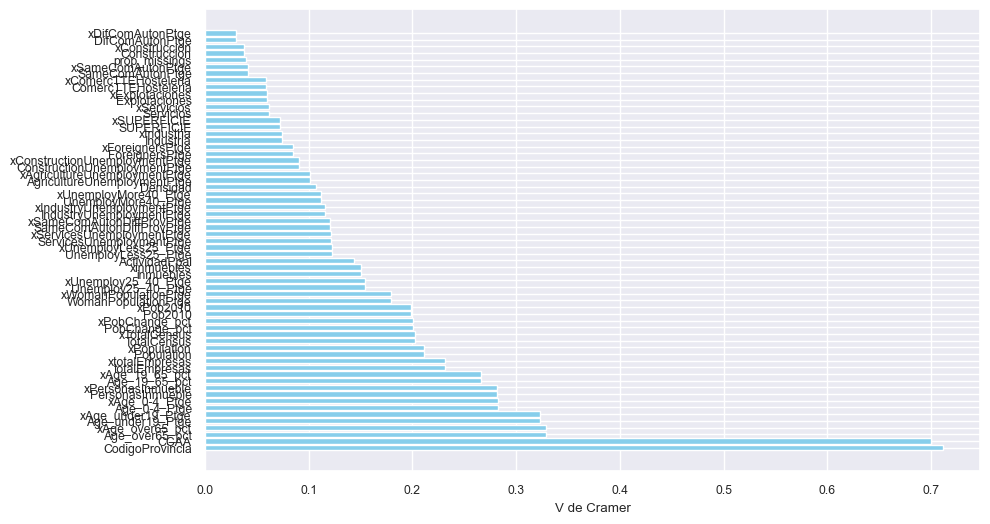

In [58]:
fm.graficoVcramer(input_bin, varObjBin)

# Comenzamos con la regresion lineal

In [59]:
# Identificamos las variables para todo el proceso

# input_cont <- todo el dataframe limpio y trabajado para hallar la variable continua

# var_cont_sin_transf <- variables continuas sin transformacion
var_cont_sin_transf = numericas_input

# var_cont <- variables continuas transformadas
var_cont = input_cont.select_dtypes(include = ['int', 'int32', 'int64','float',
                                                       'float32', 'float64']).columns.to_list()

# var_categ <- variables categoricas
var_categ = categoricas_input

In [60]:
# Obtengo la particion
x_train, x_test, y_train, y_test = train_test_split(input_cont, varObjCont, test_size = 0.2, random_state = 1234567)

In [61]:
# Seleccion de variables Stepwise, métrica AIC
modeloStepAIC = fm.lm_stepwise(y_train, x_train, var_cont_sin_transf, var_categ, [], 'AIC')

Start: AIC = 57377.10669068667

y ~ 1

                       Variable          AIC
              + CodigoProvincia 49322.212365
                         + CCAA 49734.409074
             + Age_under19_Ptge 55790.990771
               + Age_over65_pct 55899.973806
                 + Age_0-4_Ptge 56006.699374
             + PersonasInmueble 56249.605105
                + Age_19_65_pct 56711.842998
                + ActividadPpal 56985.355675
          + WomanPopulationPtge 57032.959956
     + IndustryUnemploymentPtge 57058.809745
                + PobChange_pct 57061.896840
                     + Densidad 57064.258263
     + SameComAutonDiffProvPtge 57073.007150
                   + Population 57134.813048
                  + TotalCensus 57141.767690
           + Unemploy25_40_Ptge 57224.564263
     + ServicesUnemploymentPtge 57238.025060
                + prop_missings 57334.790368
               + ForeignersPtge 57338.654999
             + SameComAutonPtge 57340.758948
  + AgricultureU

In [62]:
# Resumen del modelo
modeloStepAIC['Modelo'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Dcha_Pct   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     266.9
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        19:09:55   Log-Likelihood:                -24331.
No. Observations:                6495   AIC:                         4.880e+04
Df Residuals:                    6426   BIC:                         4.927e+04
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           40.4000      5.095      7.929      0.000      30.412      50.388
Age_over65_pct                   0.1854      0.040      4.616      0.000       0.107       0.264
ForeignersPtge                   0.1798      0.023      7.913      0.000       0.135       0.224
PersonasInmueble                 2.0783      0.398      5.221      0.000       1.298       2.859
AgricultureUnemploymentPtge     -0.0949      0.017     -5.727      0.000      -0.127      -0.062
ServicesUnemploymentPtge        -0.0376      0.006     -6.330      0.000      -0.049      -0.026
IndustryUnemploymentPtge        -0.0712      0.014     -5.151      0.000      -0.098      -0.044
DifComAutonPtge                 -0.0808      0.021     -3.774      0.000      -0.123      -0.039
WomanPopulationPtge             -0.1406      0.039     -3.613      0.000      -0.217      -0.064
ConstructionUnemploymentPtge    -0.0475      0.012     -3.808      0.000      -0.072      -0.023
Explotaciones                    0.0024      0.001      3.298      0.001       0.001       0.004
SameComAutonDiffProvPtge        -0.1141      0.037     -3.087      0.002      -0.186      -0.042
PobChange_pct                    0.0412      0.015      2.697      0.007       0.011       0.071
Age_0-4_Ptge                    -0.3039      0.123     -2.467      0.014      -0.545      -0.062
Age_19_65_pct                   -0.1053      0.047     -2.235      0.025      -0.198      -0.013
UnemployLess25_Ptge             -0.0381      0.018     -2.135      0.033      -0.073      -0.003
CodigoProvincia_10              21.8513      1.879     11.630      0.000      18.168      25.535
CodigoProvincia_11              15.6044      2.551      6.117      0.000      10.603      20.606
CodigoProvincia_12              26.5660      1.952     13.609      0.000      22.739      30.393
CodigoProvincia_13              27.2630      2.065     13.201      0.000      23.214      31.312
CodigoProvincia_14              13.6939      2.202      6.218      0.000       9.376      18.011
CodigoProvincia_15              25.1448      2.129     11.812      0.000      20.972      29.318
CodigoProvincia_16              28.3025      1.858     15.230      0.000      24.660      31.945
CodigoProvincia_17             -12.8705      1.851     -6.955      0.000     -16.498      -9.243
CodigoProvincia_18              17.2916      1.934      8.942      0.000      13.501      21.082
CodigoProvincia_19              28.6092      1.834     15.599      0.000      25.014      32.204
CodigoProvincia_2               25.5322      2.090     12.215      0.000      21.435      29.630
CodigoProvincia_20             -20.9509      2.088    -10.036      0.000     -25.043     -16.859
CodigoProvincia_21              12.5716      2.131      5.901      0.000    

In [63]:
# Preparo datos test
x_test_modeloStepAIC = fm.crear_data_modelo(x_test, modeloStepAIC['Variables']['cont'], 
                                                modeloStepAIC['Variables']['categ'], 
                                                modeloStepAIC['Variables']['inter'])

In [64]:
# R-squared del modelo para test
fm.Rsq(modeloStepAIC['Modelo'], y_test, x_test_modeloStepAIC)

0.7092534596985732

In [65]:
modeloStepAIC['Modelo'].params

const                          40.399965
Age_over65_pct                  0.185367
ForeignersPtge                  0.179814
PersonasInmueble                2.078303
AgricultureUnemploymentPtge    -0.094939
                                 ...    
CodigoProvincia_9              36.786918
Densidad_Baja                  -2.702111
Densidad_MuyBaja               -3.998017
ActividadPpal_Otro             -0.201189
ActividadPpal_ServConstInd      2.003487
Length: 69, dtype: float64

In [66]:
# Seleccion de variables Stepwise, métrica AIC
modeloStepAIC_trans = fm.lm_stepwise(y_train, x_train, var_cont, var_categ, [], 'AIC')

Start: AIC = 57377.10669068667

y ~ 1

                           Variable          AIC
                  + CodigoProvincia 49322.212365
                             + CCAA 49734.409074
                + xAge_under19_Ptge 55790.990771
                 + Age_under19_Ptge 55790.990771
                  + xAge_over65_pct 55899.973806
                   + Age_over65_pct 55899.973806
                + sqrtxAge_0-4_Ptge 55977.686243
                     + Age_0-4_Ptge 56006.699374
                 + PersonasInmueble 56249.605105
                + xPersonasInmueble 56249.605105
                + logxtotalEmpresas 56469.063323
                   + logxPopulation 56644.128654
               + sqrtxAge_19_65_pct 56691.156747
                  + logxTotalCensus 56704.137387
                    + Age_19_65_pct 56711.842998
     + logxIndustryUnemploymentPtge 56765.094897
                      + logxPob2010 56800.353285
           + logxUnemploy25_40_Ptge 56974.252011
               + raiz4PobChang

In [67]:
# Resumen del modelo
modeloStepAIC_trans['Modelo'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Dcha_Pct   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     256.1
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        19:10:52   Log-Likelihood:                -24258.
No. Observations:                6495   AIC:                         4.866e+04
Df Residuals:                    6421   BIC:                         4.917e+04
Df Model:                          73                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               84.7961     11.303      7.502      0.000      62.638     106.954
Age_over65_pct                       0.1400      0.040      3.527      0.000       0.062       0.218
logxDifComAutonPtge                 -0.6937      0.125     -5.570      0.000      -0.938      -0.450
ForeignersPtge                       0.1882      0.023      8.319      0.000       0.144       0.232
PersonasInmueble                     1.6604      0.403      4.121      0.000       0.871       2.450
logxIndustryUnemploymentPtge        -0.1447      0.041     -3.533      0.000      -0.225      -0.064
logxServicios                        0.5528      0.210      2.631      0.009       0.141       0.965
SameComAutonDiffProvPtge            -0.1202      0.037     -3.291      0.001      -0.192      -0.049
WomanPopulationPtge                 -0.1061      0.039     -2.716      0.007      -0.183      -0.030
logxComercTTEHosteleria              1.7523      0.344      5.097      0.000       1.078       2.426
AgricultureUnemploymentPtge         -0.0660      0.017     -3.905      0.000      -0.099      -0.033
raiz4Explotaciones                   2.8819      0.843      3.418      0.001       1.229       4.535
logxConstructionUnemploymentPtge    -0.1442      0.041     -3.515      0.000      -0.225      -0.064
PobChange_pct                        0.2542      0.052      4.850      0.000       0.151       0.357
raiz4PobChange_pct                 -28.8030      6.723     -4.284      0.000     -41.982     -15.624
Age_19_65_pct                       -0.3475      0.139     -2.499      0.012      -0.620      -0.075
sqrtxAge_0-4_Ptge                   -1.4808      0.453     -3.267      0.001      -2.370      -0.592
logxSUPERFICIE                      -0.3704      0.142     -2.607      0.009      -0.649      -0.092
ServicesUnemploymentPtge            -0.0248      0.006     -4.198      0.000      -0.036      -0.013
Servicios                            0.0009      0.000      2.743      0.006       0.000       0.001
logxinmuebles                       -0.6054      0.244     -2.476      0.013      -1.085      -0.126
Construccion                        -0.0057      0.002     -2.969      0.003      -0.010      -0.002
sqrtxAge_19_65_pct                   4.8986      3.176      1.542      0.123      -1.327      11.124
CodigoProvincia_10                  22.2090      1.853     11.983      0.000      18.576      25.842
CodigoProvincia_11                  14.6958      2.519      5.833      0.000       9.757      19.635
CodigoProvincia_12                  26.3047      1.924     13.672      0.000      22.533      30.076
CodigoProvincia_13                  27.4234      2.040     13.443      0.000      23.424      31.422
CodigoProvincia_14                  13.0507      2.16

In [68]:
# Preparo datos test
x_test_modeloStepAIC_trans = fm.crear_data_modelo(x_test, modeloStepAIC_trans['Variables']['cont'], 
                                                modeloStepAIC_trans['Variables']['categ'], 
                                                modeloStepAIC_trans['Variables']['inter'])

In [69]:
# R-squared del modelo para test
fm.Rsq(modeloStepAIC_trans['Modelo'], y_test, x_test_modeloStepAIC_trans)

0.7127887824680448

In [70]:
modeloStepAIC_trans['Modelo'].params

const                         84.796142
Age_over65_pct                 0.139995
logxDifComAutonPtge           -0.693654
ForeignersPtge                 0.188155
PersonasInmueble               1.660370
                                ...    
CodigoProvincia_7             19.793310
CodigoProvincia_8             -9.865721
CodigoProvincia_9             36.035366
ActividadPpal_Otro            16.818927
ActividadPpal_ServConstInd     1.890768
Length: 74, dtype: float64

In [71]:
# Seleccion de variables Stepwise, métrica BIC
modeloStepBIC = fm.lm_stepwise(y_train, x_train, var_cont_sin_transf, var_categ, [], 'BIC')

Start: BIC = 57383.885478615775

y ~ 1

                       Variable          BIC
              + CodigoProvincia 49661.151762
                         + CCAA 49849.648468
             + Age_under19_Ptge 55804.548347
               + Age_over65_pct 55913.531382
                 + Age_0-4_Ptge 56020.256950
             + PersonasInmueble 56263.162681
                + Age_19_65_pct 56725.400574
                + ActividadPpal 57005.692039
          + WomanPopulationPtge 57046.517532
     + IndustryUnemploymentPtge 57072.367321
                + PobChange_pct 57075.454416
                     + Densidad 57084.594627
     + SameComAutonDiffProvPtge 57086.564726
                   + Population 57148.370624
                  + TotalCensus 57155.325266
           + Unemploy25_40_Ptge 57238.121839
     + ServicesUnemploymentPtge 57251.582636
               + ForeignersPtge 57352.212575
             + SameComAutonPtge 57354.316524
                + prop_missings 57361.905520
  + Agriculture

In [72]:
# Resumen del modelo
modeloStepBIC['Modelo'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Dcha_Pct   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     295.3
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        19:11:06   Log-Likelihood:                -24352.
No. Observations:                6495   AIC:                         4.883e+04
Df Residuals:                    6433   BIC:                         4.925e+04
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             45.7291      2.004     22.817      0.000      41.800      49.658
Age_over65_pct                     0.2665      0.018     14.810      0.000       0.231       0.302
ForeignersPtge                     0.1848      0.023      8.180      0.000       0.141       0.229
PersonasInmueble                   2.3636      0.380      6.225      0.000       1.619       3.108
AgricultureUnemploymentPtge       -0.1040      0.016     -6.334      0.000      -0.136      -0.072
ServicesUnemploymentPtge          -0.0375      0.006     -6.309      0.000      -0.049      -0.026
IndustryUnemploymentPtge          -0.0744      0.014     -5.401      0.000      -0.101      -0.047
DifComAutonPtge                   -0.0718      0.021     -3.367      0.001      -0.114      -0.030
ConstructionUnemploymentPtge      -0.0447      0.012     -3.587      0.000      -0.069      -0.020
WomanPopulationPtge               -0.1329      0.038     -3.520      0.000      -0.207      -0.059
Explotaciones                      0.0024      0.001      3.346      0.001       0.001       0.004
CodigoProvincia_10                 3.0600      0.617      4.958      0.000       1.850       4.270
CodigoProvincia_11                -0.6186      1.817     -0.341      0.733      -4.180       2.943
CodigoProvincia_12                 5.6001      0.814      6.877      0.000       4.004       7.196
CodigoProvincia_13                 1.4735      1.026      1.437      0.151      -0.537       3.484
CodigoProvincia_14                -2.3819      1.338     -1.780      0.075      -5.005       0.242
CodigoProvincia_15                 0.2133      1.105      0.193      0.847      -1.952       2.379
CodigoProvincia_16                 2.4005      0.730      3.289      0.001       0.970       3.831
CodigoProvincia_17                -7.9499      0.676    -11.752      0.000      -9.276      -6.624
CodigoProvincia_18                 1.2732      0.905      1.406      0.160      -0.501       3.048
CodigoProvincia_19                 2.7295      0.733      3.723      0.000       1.292       4.167
CodigoProvincia_2                 -0.0650      1.064     -0.061      0.951      -2.151       2.021
CodigoProvincia_20               -20.5319      2.078     -9.882      0.000     -24.605     -16.459
CodigoProvincia_21                -3.9257      1.252     -3.135      0.002      -6.381      -1.471
CodigoProvincia_22                 0.9188      0.676      1.359      0.174      -0.407       2.244
CodigoProvincia_23                -0.8406      1.194     -0.704      0.482      -3.182       1.501
CodigoProvincia_24                -5.6832      0.750     -7.575      0.000      -7.154      -4.212
CodigoProvincia_25                -5.8739      0.672     -8.746      0.000      -7.191      -4.557
CodigoProvinci

In [73]:
x_test_modeloStepBIC = fm.crear_data_modelo(x_test, modeloStepBIC['Variables']['cont'], 
                                                modeloStepBIC['Variables']['categ'], 
                                                modeloStepBIC['Variables']['inter'])

In [74]:
# R-squared del modelo para test
fm.Rsq(modeloStepBIC['Modelo'], y_test, x_test_modeloStepBIC)

0.7074733386752228

In [75]:
# Seleccion de variables Stepwise, métrica BIC
modeloStepBIC_trans = fm.lm_stepwise(y_train, x_train, var_cont, var_categ, [], 'BIC')

Start: BIC = 57383.885478615775

y ~ 1

                           Variable          BIC
                  + CodigoProvincia 49661.151762
                             + CCAA 49849.648468
                + xAge_under19_Ptge 55804.548347
                 + Age_under19_Ptge 55804.548347
                  + xAge_over65_pct 55913.531382
                   + Age_over65_pct 55913.531382
                + sqrtxAge_0-4_Ptge 55991.243819
                     + Age_0-4_Ptge 56020.256950
                 + PersonasInmueble 56263.162681
                + xPersonasInmueble 56263.162681
                + logxtotalEmpresas 56482.620899
                   + logxPopulation 56657.686230
               + sqrtxAge_19_65_pct 56704.714323
                  + logxTotalCensus 56717.694963
                    + Age_19_65_pct 56725.400574
     + logxIndustryUnemploymentPtge 56778.652473
                      + logxPob2010 56813.910861
           + logxUnemploy25_40_Ptge 56987.809586
               + raiz4PobChan

In [76]:
# Resumen del modelo
modeloStepBIC_trans['Modelo'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Dcha_Pct   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     305.9
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        19:11:32   Log-Likelihood:                -24307.
No. Observations:                6495   AIC:                         4.874e+04
Df Residuals:                    6434   BIC:                         4.915e+04
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           20.8226      1.995     10.437      0.000      16.912      24.734
Age_over65_pct                   0.2426      0.019     12.972      0.000       0.206       0.279
logxDifComAutonPtge             -0.7597      0.123     -6.191      0.000      -1.000      -0.519
ForeignersPtge                   0.1808      0.022      8.129      0.000       0.137       0.224
logxServicesUnemploymentPtge    -0.2709      0.059     -4.623      0.000      -0.386      -0.156
PersonasInmueble                 2.0065      0.374      5.363      0.000       1.273       2.740
logxIndustryUnemploymentPtge    -0.1403      0.040     -3.546      0.000      -0.218      -0.063
logxComercTTEHosteleria          1.9077      0.185     10.303      0.000       1.545       2.271
SameComAutonDiffProvPtge        -0.1161      0.037     -3.169      0.002      -0.188      -0.044
logxtotalEmpresas               -0.3290      0.082     -4.021      0.000      -0.489      -0.169
CodigoProvincia_10              21.2588      1.849     11.498      0.000      17.634      24.883
CodigoProvincia_11              13.9695      2.524      5.536      0.000       9.022      18.917
CodigoProvincia_12              26.2229      1.930     13.589      0.000      22.440      30.006
CodigoProvincia_13              26.7382      2.029     13.177      0.000      22.760      30.716
CodigoProvincia_14              12.3841      2.155      5.748      0.000       8.160      16.608
CodigoProvincia_15              23.8665      2.095     11.393      0.000      19.760      27.973
CodigoProvincia_16              27.3746      1.840     14.877      0.000      23.768      30.982
CodigoProvincia_17             -12.7814      1.823     -7.012      0.000     -16.355      -9.208
CodigoProvincia_18              17.0515      1.891      9.018      0.000      13.345      20.758
CodigoProvincia_19              27.7080      1.828     15.156      0.000      24.124      31.292
CodigoProvincia_2               25.1257      2.065     12.168      0.000      21.078      29.174
CodigoProvincia_20             -20.5973      2.057    -10.012      0.000     -24.630     -16.564
CodigoProvincia_21              11.3464      2.091      5.427      0.000       7.248      15.445
CodigoProvincia_22              25.2286      1.844     13.685      0.000      21.615      28.843
CodigoProvincia_23              14.0206      2.027      6.918      0.000      10.047      17.994
CodigoProvincia_24              28.8697      1.852     15.586      0.000      25.239      32.501
CodigoProvincia_25             -10.9757      1.817     -6.041      0.000     -14.538      -7.414
CodigoProvincia_26              31.7848      1.901     16.719      0.000      28.058      35.512
CodigoProvincia_27              27.6929      2.277     12.159      0.000    

In [77]:
x_test_modeloStepBIC_trans = fm.crear_data_modelo(x_test, modeloStepBIC_trans['Variables']['cont'], 
                                                modeloStepBIC_trans['Variables']['categ'], 
                                                modeloStepBIC_trans['Variables']['inter'])

In [78]:
# R-squared del modelo para test
fm.Rsq(modeloStepBIC_trans['Modelo'], y_test, x_test_modeloStepBIC_trans)

0.7130561518162639

In [79]:
# Seleccion de variables Backward, métrica BIC
modeloBackBIC = fm.lm_backward(y_train, x_train, var_cont_sin_transf, var_categ, [], 'BIC')

Start: BIC = 49385.750092104114

y ~ Population + TotalCensus + Age_0-4_Ptge + Age_under19_Ptge + Age_19_65_pct + Age_over65_pct + WomanPopulationPtge + ForeignersPtge + SameComAutonPtge + SameComAutonDiffProvPtge + DifComAutonPtge + UnemployLess25_Ptge + Unemploy25_40_Ptge + UnemployMore40_Ptge + AgricultureUnemploymentPtge + IndustryUnemploymentPtge + ConstructionUnemploymentPtge + ServicesUnemploymentPtge + totalEmpresas + Industria + Construccion + ComercTTEHosteleria + Servicios + inmuebles + Pob2010 + SUPERFICIE + PobChange_pct + PersonasInmueble + Explotaciones + CodigoProvincia + CCAA + ActividadPpal + Densidad + prop_missings

                       Variable          BIC
              - CodigoProvincia 49545.938165
               - ForeignersPtge 49409.969220
             - PersonasInmueble 49406.881120
  - AgricultureUnemploymentPtge 49396.983520
          - ComercTTEHosteleria 49395.337458
                    - Industria 49395.187871
                - totalEmpresas 49394.120

In [80]:
# Resumen del modelo
modeloBackBIC['Modelo'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Dcha_Pct   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     266.9
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        19:11:55   Log-Likelihood:                -24332.
No. Observations:                6495   AIC:                         4.880e+04
Df Residuals:                    6426   BIC:                         4.927e+04
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           23.7498      2.195     10.820      0.000      19.447      28.053
Age_over65_pct                   0.2419      0.019     12.783      0.000       0.205       0.279
ForeignersPtge                   0.1867      0.023      8.213      0.000       0.142       0.231
DifComAutonPtge                 -0.0752      0.021     -3.501      0.000      -0.117      -0.033
AgricultureUnemploymentPtge     -0.0916      0.017     -5.529      0.000      -0.124      -0.059
IndustryUnemploymentPtge        -0.0695      0.014     -5.004      0.000      -0.097      -0.042
ConstructionUnemploymentPtge    -0.0401      0.012     -3.207      0.001      -0.065      -0.016
ServicesUnemploymentPtge        -0.0363      0.006     -6.120      0.000      -0.048      -0.025
totalEmpresas                   -0.0532      0.011     -4.895      0.000      -0.075      -0.032
Industria                        0.0583      0.012      4.944      0.000       0.035       0.081
Construccion                     0.0481      0.011      4.332      0.000       0.026       0.070
ComercTTEHosteleria              0.0538      0.011      4.937      0.000       0.032       0.075
Servicios                        0.0534      0.011      4.909      0.000       0.032       0.075
PersonasInmueble                 2.1593      0.385      5.605      0.000       1.404       2.915
Explotaciones                    0.0024      0.001      3.194      0.001       0.001       0.004
SameComAutonDiffProvPtge        -0.1126      0.037     -3.052      0.002      -0.185      -0.040
CodigoProvincia_10              21.4405      1.869     11.470      0.000      17.776      25.105
CodigoProvincia_11              14.9871      2.553      5.870      0.000       9.982      19.992
CodigoProvincia_12              26.2327      1.949     13.462      0.000      22.413      30.053
CodigoProvincia_13              26.8365      2.058     13.042      0.000      22.803      30.870
CodigoProvincia_14              12.8193      2.194      5.843      0.000       8.519      17.120
CodigoProvincia_15              25.0230      2.122     11.792      0.000      20.863      29.183
CodigoProvincia_16              27.8281      1.854     15.009      0.000      24.193      31.463
CodigoProvincia_17             -12.6382      1.850     -6.833      0.000     -16.264      -9.013
CodigoProvincia_18              16.8522      1.929      8.736      0.000      13.071      20.634
CodigoProvincia_19              28.1975      1.836     15.361      0.000      24.599      31.796
CodigoProvincia_2               25.2914      2.087     12.116      0.000      21.199      29.383
CodigoProvincia_20             -21.1405      2.087    -10.129      0.000     -25.232     -17.049
CodigoProvincia_21              11.7747      2.123      5.545      0.000    

In [81]:
# Preparo datos test
x_test_modeloBackBIC = fm.crear_data_modelo(x_test, modeloBackBIC['Variables']['cont'], 
                                                modeloBackBIC['Variables']['categ'], 
                                                modeloBackBIC['Variables']['inter'])


In [82]:
# R-squared del modelo para test
fm.Rsq(modeloBackBIC['Modelo'], y_test, x_test_modeloBackBIC)

0.7107066743438605

In [83]:
# Seleccion de variables Backward, métrica BIC
modeloBackBIC_trans = fm.lm_backward(y_train, x_train, var_cont, var_categ, [], 'BIC')

Start: BIC = 49444.865986466575

y ~ Population + TotalCensus + Age_0-4_Ptge + Age_under19_Ptge + Age_19_65_pct + Age_over65_pct + WomanPopulationPtge + ForeignersPtge + SameComAutonPtge + SameComAutonDiffProvPtge + DifComAutonPtge + UnemployLess25_Ptge + Unemploy25_40_Ptge + UnemployMore40_Ptge + AgricultureUnemploymentPtge + IndustryUnemploymentPtge + ConstructionUnemploymentPtge + ServicesUnemploymentPtge + totalEmpresas + Industria + Construccion + ComercTTEHosteleria + Servicios + inmuebles + Pob2010 + SUPERFICIE + PobChange_pct + PersonasInmueble + Explotaciones + logxPopulation + logxTotalCensus + sqrtxAge_0-4_Ptge + xAge_under19_Ptge + sqrtxAge_19_65_pct + xAge_over65_pct + xWomanPopulationPtge + logxForeignersPtge + expxSameComAutonPtge + xSameComAutonDiffProvPtge + logxDifComAutonPtge + logxUnemployLess25_Ptge + logxUnemploy25_40_Ptge + logxUnemployMore40_Ptge + logxAgricultureUnemploymentPtge + logxIndustryUnemploymentPtge + logxConstructionUnemploymentPtge + logxServicesUne

In [84]:
# Resumen del modelo
modeloBackBIC_trans['Modelo'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Dcha_Pct   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     293.2
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        19:13:54   Log-Likelihood:                -24291.
No. Observations:                6495   AIC:                         4.871e+04
Df Residuals:                    6431   BIC:                         4.914e+04
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               67.4806     10.158      6.643      0.000      47.567      87.394
ForeignersPtge                       0.1824      0.022      8.149      0.000       0.139       0.226
AgricultureUnemploymentPtge         -0.0602      0.016     -3.695      0.000      -0.092      -0.028
ServicesUnemploymentPtge            -0.0292      0.006     -5.103      0.000      -0.040      -0.018
PobChange_pct                        0.2571      0.052      4.944      0.000       0.155       0.359
xAge_over65_pct                      3.0920      0.225     13.748      0.000       2.651       3.533
logxDifComAutonPtge                 -0.7765      0.123     -6.337      0.000      -1.017      -0.536
logxIndustryUnemploymentPtge        -0.1779      0.038     -4.649      0.000      -0.253      -0.103
logxConstructionUnemploymentPtge    -0.1735      0.039     -4.477      0.000      -0.250      -0.098
logxComercTTEHosteleria              1.6142      0.175      9.210      0.000       1.271       1.958
raiz4PobChange_pct                 -29.9534      6.678     -4.486      0.000     -43.044     -16.863
xPersonasInmueble                    1.1218      0.213      5.264      0.000       0.704       1.540
xSameComAutonDiffProvPtge           -0.5659      0.164     -3.453      0.001      -0.887      -0.245
CodigoProvincia_10                  21.9270      1.853     11.836      0.000      18.295      25.559
CodigoProvincia_11                  14.4847      2.520      5.749      0.000       9.545      19.424
CodigoProvincia_12                  26.5662      1.927     13.784      0.000      22.788      30.344
CodigoProvincia_13                  27.5220      2.030     13.555      0.000      23.542      31.502
CodigoProvincia_14                  13.1875      2.157      6.113      0.000       8.958      17.416
CodigoProvincia_15                  23.9043      2.093     11.423      0.000      19.802      28.007
CodigoProvincia_16                  27.8336      1.840     15.130      0.000      24.227      31.440
CodigoProvincia_17                 -12.6818      1.823     -6.955      0.000     -16.256      -9.107
CodigoProvincia_18                  17.6469      1.891      9.330      0.000      13.939      21.354
CodigoProvincia_19                  27.8551      1.825     15.263      0.000      24.278      31.433
CodigoProvincia_2                   25.7762      2.065     12.482      0.000      21.728      29.824
CodigoProvincia_20                 -20.8180      2.056    -10.128      0.000     -24.848     -16.788
CodigoProvincia_21                  12.0248      2.090      5.754      0.000       7.928      16.121
CodigoProvincia_22                  25.3705      1.841     13.783      0.000      21.762      28.979
CodigoProvincia_23                  15.2090      2.04

In [85]:
x_test_modeloBackBIC_trans = fm.crear_data_modelo(x_test, modeloBackBIC_trans['Variables']['cont'], 
                                                modeloBackBIC_trans['Variables']['categ'], 
                                                modeloBackBIC_trans['Variables']['inter'])

In [86]:
# R-squared del modelo para test
fm.Rsq(modeloBackBIC_trans['Modelo'], y_test, x_test_modeloBackBIC_trans)

0.7123035901629233

In [87]:
# Hago validacion cruzada repetida para ver que modelo es mejor
# Crea un DataFrame vacío para almacenar resultados
results = pd.DataFrame({
    'Rsquared': []
    , 'Resample': []
    , 'Modelo': []
})
# Realiza el siguiente proceso 20 veces (representado por el bucle `for rep in range(20)`)

for rep in range(20):
    # Realiza validación cruzada en cuatro modelos diferentes y almacena sus R-squared en listas separadas

    modelo_stepAIC = fm.validacion_cruzada_lm(
        5
        , x_train
        , y_train
        , modeloStepAIC['Variables']['cont']
        , modeloStepAIC['Variables']['categ']
    )
    modelo_stepBIC = fm.validacion_cruzada_lm(
        5
        , x_train
        , y_train
        , modeloStepBIC['Variables']['cont']
        , modeloStepBIC['Variables']['categ']
    )
    modelo_backBIC = fm.validacion_cruzada_lm(
        5
        , x_train
        , y_train
        , modeloBackBIC['Variables']['cont']
        , modeloBackBIC['Variables']['categ']
        , modeloBackBIC['Variables']['inter']
    )
    modelo_stepAIC_trans = fm.validacion_cruzada_lm(
        5
        , x_train
        , y_train
        , modeloStepAIC_trans['Variables']['cont']
        , modeloStepAIC_trans['Variables']['categ']
    )
    modelo_stepBIC_trans = fm.validacion_cruzada_lm(
        5
        , x_train
        , y_train
        , modeloStepBIC_trans['Variables']['cont']
        , modeloStepBIC_trans['Variables']['categ']
    )
    modelo_backBIC_trans = fm.validacion_cruzada_lm(
        5
        , x_train
        , y_train
        , modeloBackBIC_trans['Variables']['cont']
        , modeloBackBIC_trans['Variables']['categ']
        , modeloBackBIC_trans['Variables']['inter']
    )
    # Crea un DataFrame con los resultados de validación cruzada para esta repetición

    results_rep = pd.DataFrame({
        'Rsquared': modelo_stepAIC + modelo_stepBIC + modelo_backBIC + modelo_stepAIC_trans + modelo_stepBIC_trans + modelo_backBIC_trans
        , 'Resample': ['Rep' + str((rep + 1))]*5*6 # Etiqueta de repetición (5 repeticiones 6 modelos)
        , 'Modelo': [1]*5 + [2]*5 + [3]*5 + [4]*5 + [5]*5 + [6]*5 # Etiqueta de modelo (6 modelos 5 repeticiones)
    })
    results = pd.concat([results, results_rep], axis = 0)

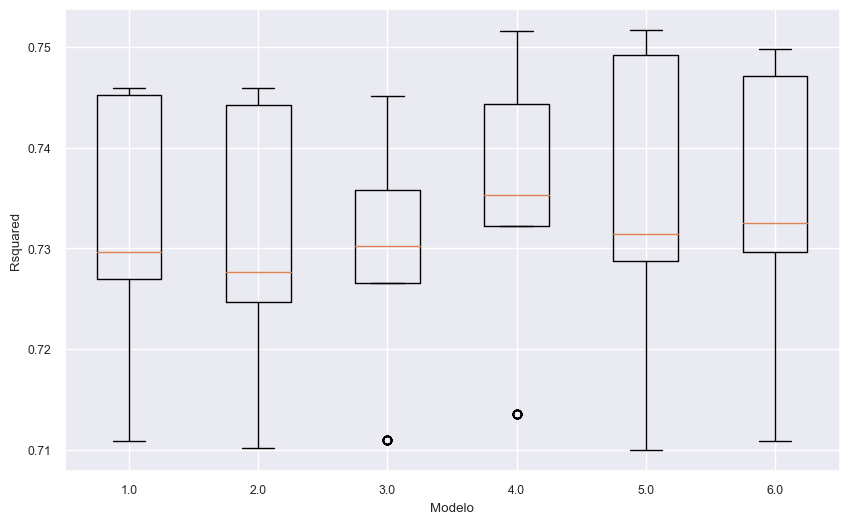

In [88]:
# Boxplot de la validacion cruzada 
plt.figure(figsize=(10, 6))  # Crea una figura de tamaño 10x6
plt.grid(True)  # Activa la cuadrícula en el gráficoç
# Agrupa los valores de Rsquared por modelo
grupo_metrica = results.groupby('Modelo')['Rsquared']
# Organiza los valores de R-squared por grupo en una lista
boxplot_data = [grupo_metrica.get_group(grupo).tolist() for grupo in grupo_metrica.groups]
# Crea un boxplot con los datos organizados
plt.boxplot(boxplot_data, labels=grupo_metrica.groups.keys())  # Etiqueta los grupos en el boxplot
# Etiqueta los ejes del gráfico
plt.xlabel('Modelo')  # Etiqueta del eje x
plt.ylabel('Rsquared')  # Etiqueta del eje y
plt.show()  # Muestra el gráfico  

In [89]:
# Calcular la media de las métricas R-squared por modelo
media_r2 = results.groupby('Modelo')['Rsquared'].mean()
# Calcular la desviación estándar de las métricas R-squared por modelo
std_r2 = results.groupby('Modelo')['Rsquared'].std()
# Contar el número de parámetros en cada modelo
num_params = [len(modeloStepAIC['Modelo'].params), len(modeloStepBIC['Modelo'].params), len(modeloBackBIC['Modelo'].params), 
 len(modeloStepAIC_trans['Modelo'].params), len(modeloStepBIC_trans['Modelo'].params), 
 len(modeloBackBIC_trans['Modelo'].params)]

In [90]:
media_r2

Modelo
1.0    0.731722
2.0    0.730563
3.0    0.729760
4.0    0.735404
5.0    0.734187
6.0    0.733994
Name: Rsquared, dtype: float64

In [91]:
std_r2

Modelo
1.0    0.013091
2.0    0.013347
3.0    0.011338
4.0    0.012938
5.0    0.015270
6.0    0.014058
Name: Rsquared, dtype: float64

In [92]:
num_params

[69, 78, 69, 74, 61, 64]

In [93]:
# A partir de estos resultados nos quedamos con dos opciones
# La primera de ellas es el Modelo Step BIC con variables transformadas
# Porque tiene un R2 de 0.734, un std de 0.015 (el más alto) y 61 parametros
# La segunda de ellas es el Modelo Step AIC con variables transformadas
# Porque tiene un R2 de 0.735, un std de 0.012 (uno de los mas bajos), pero 74 parametros
# Es un poco más certero a costa de mas parametros

## Seleccion aleatoria (se coge la submuestra de los datos de entrenamiento)

In [149]:
# Inicializar un diccionario para almacenar las fórmulas y variables seleccionadas.
variables_seleccionadas = {
    'Formula': [],
    'Variables': [],
    'Modelo':[],
    'X':[]
}

In [150]:
# Interacciones 2 a 2 de todas las variables (excepto las continuas transformadas)
interacciones = var_cont_sin_transf + var_categ
interacciones_unicas = list(itertools.combinations(interacciones, 2)) 

In [151]:
# Realizar 10 iteraciones de selección aleatoria.
for x in range(10):
    print('---------------------------- iter: ' + str(x))
    
    # Dividir los datos de entrenamiento en conjuntos de entrenamiento y prueba.
    x_train2, x_test2, y_train2, y_test2 = train_test_split(x_train, y_train, 
                                                            test_size = 0.2, random_state = 1234567 + x)
    
    # Realizar la selección stepwise utilizando el criterio BIC en la submuestra.
    modelo = fm.lm_stepwise(y_train2.astype(int), x_train2, var_cont, var_categ, interacciones_unicas[:25], 'BIC')
    
    # Almacenar las variables seleccionadas y la fórmula correspondiente.
    variables_seleccionadas['Variables'].append(modelo['Variables'])
    variables_seleccionadas['Formula'].append(sorted(modelo['Modelo'].model.exog_names))
    variables_seleccionadas['Modelo'].append(modelo['Modelo'])
    variables_seleccionadas['X'].append(modelo['X'])

---------------------------- iter: 0
Start: BIC = 45915.04819122885

y ~ 1

                                         Variable          BIC
                                + CodigoProvincia 39815.497229
                                           + CCAA 39888.372248
                               + Age_under19_Ptge 44672.024413
                              + xAge_under19_Ptge 44672.024413
                                 + Age_over65_pct 44774.028807
                                + xAge_over65_pct 44774.028807
                              + sqrtxAge_0-4_Ptge 44810.194413
                                   + Age_0-4_Ptge 44829.221473
                              + xPersonasInmueble 45047.518545
                               + PersonasInmueble 45047.518545
                              + logxtotalEmpresas 45186.578043
                                 + logxPopulation 45335.668996
                                + logxTotalCensus 45385.895146
                             + sqrtxAge_19

In [152]:
# Unir las variables en las fórmulas seleccionadas en una sola cadena.
variables_seleccionadas['Formula'] = list(map(lambda x: '+'.join(x), variables_seleccionadas['Formula']))

In [153]:
# Calcular la frecuencia de cada fórmula y ordenarlas por frecuencia.
frecuencias = Counter(variables_seleccionadas['Formula'])
frec_ordenada = pd.DataFrame(list(frecuencias.items()), columns = ['Formula', 'Frecuencia'])
frec_ordenada = frec_ordenada.sort_values('Frecuencia', ascending = False).reset_index()

In [154]:
# Identificar las tres fórmulas más frecuentes y las variables correspondientes.
var_1 = variables_seleccionadas['Variables'][variables_seleccionadas['Formula'].index(
    frec_ordenada['Formula'][0])]
var_2 = variables_seleccionadas['Variables'][variables_seleccionadas['Formula'].index(
    frec_ordenada['Formula'][1])]
var_3 = variables_seleccionadas['Variables'][variables_seleccionadas['Formula'].index(
    frec_ordenada['Formula'][2])]

In [155]:
mod_1 = variables_seleccionadas['Modelo'][variables_seleccionadas['Formula'].index(
    frec_ordenada['Formula'][0])]
mod_2 = variables_seleccionadas['Modelo'][variables_seleccionadas['Formula'].index(
    frec_ordenada['Formula'][1])]
mod_3 = variables_seleccionadas['Modelo'][variables_seleccionadas['Formula'].index(
    frec_ordenada['Formula'][2])]

In [156]:
X_1 = variables_seleccionadas['X'][variables_seleccionadas['Formula'].index(
    frec_ordenada['Formula'][0])]
X_2 = variables_seleccionadas['X'][variables_seleccionadas['Formula'].index(
    frec_ordenada['Formula'][1])]
X_3 = variables_seleccionadas['X'][variables_seleccionadas['Formula'].index(
    frec_ordenada['Formula'][2])]

In [157]:
# Preparo datos test
x_test_modelo1 = fm.crear_data_modelo(x_test, var_1['cont'], 
                                              var_1['categ'], 
                                              var_1['inter'])
# R-squared del modelo para test
fm.Rsq(mod_1, y_test, x_test_modelo1)

0.7126516149085036

In [158]:
# Preparo datos test
x_test_modelo2 = fm.crear_data_modelo(x_test, var_2['cont'], 
                                              var_2['categ'], 
                                              var_2['inter'])
# R-squared del modelo para test
fm.Rsq(mod_2, y_test, x_test_modelo2)

0.7104568030301684

In [159]:
# Preparo datos test
x_test_modelo3 = fm.crear_data_modelo(x_test, var_3['cont'], 
                                              var_3['categ'], 
                                              var_3['inter'])
# R-squared del modelo para test
fm.Rsq(mod_3, y_test, x_test_modelo3)

0.7155268457383277

In [160]:
## Comparacion final, tomo el ganador de antes y los nuevos candidatos
results = pd.DataFrame({
    'Rsquared': []
    , 'Resample': []
    , 'Modelo': []
})
for rep in range(20):
    modelo1 = fm.validacion_cruzada_lm(
        5
        , x_train
        , y_train
        , modeloStepBIC_trans['Variables']['cont']
        , modeloStepBIC_trans['Variables']['categ']
        , modeloStepBIC_trans['Variables']['inter']
    )
    modelo2 = fm.validacion_cruzada_lm(
        5
        , x_train
        , y_train
        , var_1['cont']
        , var_1['categ']
        , var_1['inter']
    )
    modelo3 = fm.validacion_cruzada_lm(
        5
        , x_train
        , y_train
        , var_2['cont']
        , var_2['categ']
        , var_2['inter']
    )
    modelo4 = fm.validacion_cruzada_lm(
        5
        , x_train
        , y_train
        , var_3['cont']
        , var_3['categ']
        , var_3['inter']
    )
    results_rep = pd.DataFrame({
        'Rsquared': modelo1 + modelo2 + modelo3 + modelo4
        , 'Resample': ['Rep' + str((rep + 1))]*5*4
        , 'Modelo': [1]*5 + [2]*5 + [3]*5 + [4]*5
    })
    results = pd.concat([results, results_rep], axis = 0)

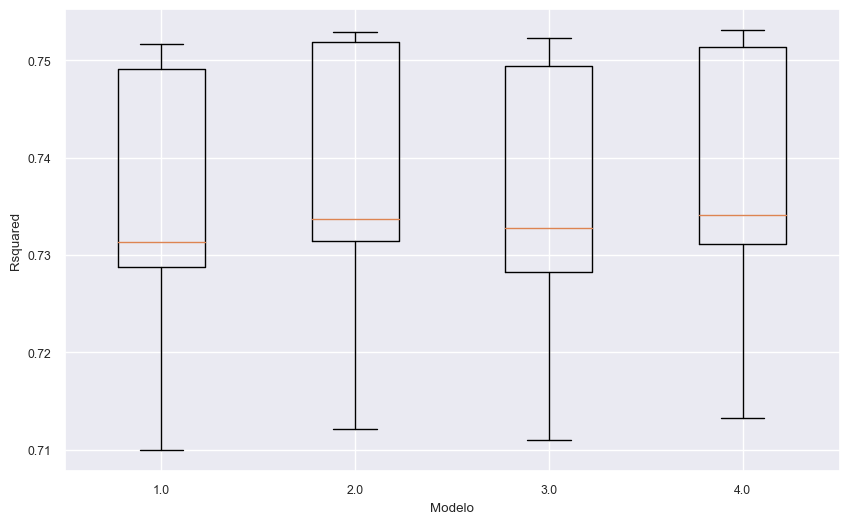

In [161]:
# Boxplot de la validacion cruzada 
plt.figure(figsize=(10, 6))  # Crea una figura de tamaño 10x6
plt.grid(True)  # Activa la cuadrícula en el gráficoç
# Agrupa los valores de Rsquared por modelo
grupo_metrica = results.groupby('Modelo')['Rsquared']
# Organiza los valores de R-squared por grupo en una lista
boxplot_data = [grupo_metrica.get_group(grupo).tolist() for grupo in grupo_metrica.groups]
# Crea un boxplot con los datos organizados
plt.boxplot(boxplot_data, labels=grupo_metrica.groups.keys())  # Etiqueta los grupos en el boxplot
# Etiqueta los ejes del gráfico
plt.xlabel('Modelo')  # Etiqueta del eje x
plt.ylabel('Rsquared')  # Etiqueta del eje y
plt.show()  # Muestra el gráfico  

In [162]:
# Calcular la media de las métricas R-squared por modelo
media_r2_v2 = results.groupby('Modelo')['Rsquared'].mean()
# Calcular la desviación estándar de las métricas R-squared por modelo
std_r2_v2 = results.groupby('Modelo')['Rsquared'].std()
# Contar el número de parámetros en cada modelo
num_params_v2 = [len(modeloStepBIC_trans['Modelo'].params), 
                 len(frec_ordenada['Formula'][0].split('+')),
                 len(frec_ordenada['Formula'][1].split('+')), 
                 len(frec_ordenada['Formula'][2].split('+'))]

In [163]:
media_r2_v2

Modelo
1.0    0.734187
2.0    0.736394
3.0    0.734749
4.0    0.736617
Name: Rsquared, dtype: float64

In [164]:
std_r2_v2

Modelo
1.0    0.015270
2.0    0.015143
3.0    0.015127
4.0    0.014714
Name: Rsquared, dtype: float64

In [165]:
num_params_v2

[61, 64, 62, 64]

In [111]:
#	                        R2	        R2 - test	       std	    parametros	
# Modelo Step BIC trans	0.734187	0.7123035901629233	0.015270	    61
# Modelo Step AIC trans	0.735404	0.7127887824680448	0.012938	    74
# Modelo 1	            0.736394	0.7126516149085036	0.015143	    64
# Modelo 2	            0.734749	0.7104568030301684	0.015127	    62
# Modelo 3	            0.736617	0.7155268457383277	0.014714	    64

# La solucion es el modelo Step BIC trans porque tiene un menor numero de parametros, ya que el resto de modelos tiene más, en el caso del R2 es muy similar a los otros

In [178]:
# Una vez decidido el mejor modelo, hay que evaluarlo 
ModeloGanador = modeloStepBIC_trans

# Vemos los coeficientes del modelo ganador
ModeloGanador['Modelo'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Dcha_Pct   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     305.9
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        19:50:01   Log-Likelihood:                -24307.
No. Observations:                6495   AIC:                         4.874e+04
Df Residuals:                    6434   BIC:                         4.915e+04
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           20.8226      1.995     10.437      0.000      16.912      24.734
Age_over65_pct                   0.2426      0.019     12.972      0.000       0.206       0.279
logxDifComAutonPtge             -0.7597      0.123     -6.191      0.000      -1.000      -0.519
ForeignersPtge                   0.1808      0.022      8.129      0.000       0.137       0.224
logxServicesUnemploymentPtge    -0.2709      0.059     -4.623      0.000      -0.386      -0.156
PersonasInmueble                 2.0065      0.374      5.363      0.000       1.273       2.740
logxIndustryUnemploymentPtge    -0.1403      0.040     -3.546      0.000      -0.218      -0.063
logxComercTTEHosteleria          1.9077      0.185     10.303      0.000       1.545       2.271
SameComAutonDiffProvPtge        -0.1161      0.037     -3.169      0.002      -0.188      -0.044
logxtotalEmpresas               -0.3290      0.082     -4.021      0.000      -0.489      -0.169
CodigoProvincia_10              21.2588      1.849     11.498      0.000      17.634      24.883
CodigoProvincia_11              13.9695      2.524      5.536      0.000       9.022      18.917
CodigoProvincia_12              26.2229      1.930     13.589      0.000      22.440      30.006
CodigoProvincia_13              26.7382      2.029     13.177      0.000      22.760      30.716
CodigoProvincia_14              12.3841      2.155      5.748      0.000       8.160      16.608
CodigoProvincia_15              23.8665      2.095     11.393      0.000      19.760      27.973
CodigoProvincia_16              27.3746      1.840     14.877      0.000      23.768      30.982
CodigoProvincia_17             -12.7814      1.823     -7.012      0.000     -16.355      -9.208
CodigoProvincia_18              17.0515      1.891      9.018      0.000      13.345      20.758
CodigoProvincia_19              27.7080      1.828     15.156      0.000      24.124      31.292
CodigoProvincia_2               25.1257      2.065     12.168      0.000      21.078      29.174
CodigoProvincia_20             -20.5973      2.057    -10.012      0.000     -24.630     -16.564
CodigoProvincia_21              11.3464      2.091      5.427      0.000       7.248      15.445
CodigoProvincia_22              25.2286      1.844     13.685      0.000      21.615      28.843
CodigoProvincia_23              14.0206      2.027      6.918      0.000      10.047      17.994
CodigoProvincia_24              28.8697      1.852     15.586      0.000      25.239      32.501
CodigoProvincia_25             -10.9757      1.817     -6.041      0.000     -14.538      -7.414
CodigoProvincia_26              31.7848      1.901     16.719      0.000      28.058      35.512
CodigoProvincia_27              27.6929      2.277     12.159      0.000    

In [180]:
# Evaluamos la estabilidad del modelo a partir de las diferencias en train y test
fm.Rsq(ModeloGanador['Modelo'], y_train, ModeloGanador['X'])

0.7404360836328823

In [181]:
x_test_modeloganador = fm.crear_data_modelo(x_test, ModeloGanador['Variables']['cont'], 
                                                ModeloGanador['Variables']['categ'], 
                                                ModeloGanador['Variables']['inter'])

In [182]:
fm.Rsq(ModeloGanador['Modelo'], y_test, x_test_modeloganador)

0.7130561518162639

# Comenzamos con la regresión logística

In [274]:
# Identificamos las variables para todo el proceso

# input_cont <- todo el dataframe limpio y trabajado para hallar la variable continua

# var_cont_sin_transf <- variables continuas sin transformacion
var_cont_sin_transf = numericas_input

# var_contB <- variables continuas transformadas
var_contB = input_bin.select_dtypes(include = ['int', 'int32', 'int64','float',
                                                       'float32', 'float64']).columns.to_list()

# var_categ <- variables categoricas
var_categ = categoricas_input

In [235]:
# Hago la particion
x_train, x_test, y_train, y_test = train_test_split(input_bin, varObjBin, test_size = 0.2, random_state = 1234567)
# Indico que la variable respuesta es numérica (hay que introducirla en el algoritmo de phython tal y como la va a tratar)
y_train, y_test = y_train.astype(int), y_test.astype(int)

In [261]:
# Seleccion de variables Stepwise, variables originales sin transformar y sin interacciones, métrica AIC
modeloStepAIC = fm.glm_stepwise(y_train, x_train, var_cont_sin_transf, var_categ, [], 'AIC')

Start: AIC = 8617.254778493008

y ~ 1

                       Variable         AIC
              + CodigoProvincia 4805.998677
                         + CCAA 4916.587789
             + Age_under19_Ptge 7962.964057
               + Age_over65_pct 8001.638082
             + PersonasInmueble 8076.665461
                 + Age_0-4_Ptge 8110.866750
                + Age_19_65_pct 8331.117761
                + ActividadPpal 8466.672587
          + WomanPopulationPtge 8476.523837
     + SameComAutonDiffProvPtge 8485.388740
                + PobChange_pct 8511.326761
                   + Population 8515.248184
                  + TotalCensus 8515.958088
                     + Densidad 8536.288563
     + IndustryUnemploymentPtge 8550.739285
          + UnemployLess25_Ptge 8555.019131
  + AgricultureUnemploymentPtge 8559.895824
           + Unemploy25_40_Ptge 8566.199094
     + ServicesUnemploymentPtge 8598.182395
                + prop_missings 8604.088325
                   + SUPERFICIE 8612.

In [262]:
# Resumen del modelo
fm.summary_glm(modeloStepAIC['Modelo'], y_train, modeloStepAIC['X'])

{'Contrastes':                       Variable  Estimate    Std. Error       z value  \
 0                  (Intercept)  1.416130  2.592368e+07  5.462688e-08   
 1                Explotaciones  0.001069  2.174906e-04  4.916382e+00   
 2                Age_19_65_pct -0.029713  6.799539e-03 -4.369915e+00   
 3               ForeignersPtge  0.030331  6.726216e-03  4.509317e+00   
 4              DifComAutonPtge -0.017846  5.385015e-03 -3.314049e+00   
 ..                         ...       ...           ...           ...   
 70                CCAA_Navarra -0.289687  8.106292e+07 -3.573604e-09   
 71              CCAA_PaísVasco -1.861936  2.592368e+07 -7.182375e-08   
 72                  CCAA_Rioja  1.082159  6.492625e+08  1.666751e-09   
 73          ActividadPpal_Otro  0.180893  1.056148e-01  1.712765e+00   
 74  ActividadPpal_ServConstInd  0.925830  1.916918e-01  4.829783e+00   
 
      p value signif  
 0   1.000000         
 1   0.000001    ***  
 2   0.000013    ***  
 3   0.000007   

In [263]:
# Calculamos la medida de ajuste R^2 para train
fm.pseudoR2(modeloStepAIC['Modelo'], modeloStepAIC['X'], y_train)

Optimization terminated successfully.
         Current function value: 0.663068
         Iterations 4


0.4648295901961391

In [264]:
# Preparo datos test
x_test_modeloStepAIC = fm.crear_data_modelo(x_test, modeloStepAIC['Variables']['cont'], 
                                                modeloStepAIC['Variables']['categ'], 
                                                modeloStepAIC['Variables']['inter'])
# R-squared del modelo para test
fm.pseudoR2(modeloStepAIC['Modelo'], x_test_modeloStepAIC, y_test)

Optimization terminated successfully.
         Current function value: 0.665222
         Iterations 4


0.44390257283239254

In [250]:
# Seleccion de variables Stepwise, métrica BIC
modeloStepBIC = fm.glm_stepwise(y_train, x_train, var_cont_sin_transf, var_categ, [], 'BIC')

Start: BIC = 8630.812354351217

y ~ 1

                       Variable         BIC
              + CodigoProvincia 4819.556252
                         + CCAA 4930.145365
             + Age_under19_Ptge 7976.521633
               + Age_over65_pct 8015.195658
             + PersonasInmueble 8090.223037
                 + Age_0-4_Ptge 8124.424326
                + Age_19_65_pct 8344.675337
                + ActividadPpal 8480.230163
          + WomanPopulationPtge 8490.081413
     + SameComAutonDiffProvPtge 8498.946316
                + PobChange_pct 8524.884337
                   + Population 8528.805760
                  + TotalCensus 8529.515663
                     + Densidad 8549.846139
     + IndustryUnemploymentPtge 8564.296861
          + UnemployLess25_Ptge 8568.576707
  + AgricultureUnemploymentPtge 8573.453400
           + Unemploy25_40_Ptge 8579.756670
     + ServicesUnemploymentPtge 8611.739971
                + prop_missings 8617.645901
                   + SUPERFICIE 8626.

In [251]:
# Resumen del modelo
fm.summary_glm(modeloStepBIC['Modelo'], y_train, modeloStepBIC['X'])

{'Contrastes':                       Variable  Estimate    Std. Error       z value  \
 0                  (Intercept)  1.416130  2.592368e+07  5.462688e-08   
 1                Explotaciones  0.001069  2.174906e-04  4.916382e+00   
 2                Age_19_65_pct -0.029713  6.799539e-03 -4.369915e+00   
 3               ForeignersPtge  0.030331  6.726216e-03  4.509317e+00   
 4              DifComAutonPtge -0.017846  5.385015e-03 -3.314049e+00   
 ..                         ...       ...           ...           ...   
 70                CCAA_Navarra -0.289687  8.106292e+07 -3.573604e-09   
 71              CCAA_PaísVasco -1.861936  2.592368e+07 -7.182375e-08   
 72                  CCAA_Rioja  1.082159  6.492625e+08  1.666751e-09   
 73          ActividadPpal_Otro  0.180893  1.056148e-01  1.712765e+00   
 74  ActividadPpal_ServConstInd  0.925830  1.916918e-01  4.829783e+00   
 
      p value signif  
 0   1.000000         
 1   0.000001    ***  
 2   0.000013    ***  
 3   0.000007   

In [253]:
# Calculamos la medida de ajuste R^2 para train
fm.pseudoR2(modeloStepBIC['Modelo'], modeloStepBIC['X'], y_train)

Optimization terminated successfully.
         Current function value: 0.663068
         Iterations 4


0.4648295901961391

In [254]:
# Preparo datos test
x_test_modeloStepBIC = fm.crear_data_modelo(x_test, modeloStepBIC['Variables']['cont'], 
                                                modeloStepBIC['Variables']['categ'], 
                                                modeloStepBIC['Variables']['inter'])
# R-squared del modelo para test
fm.pseudoR2(modeloStepBIC['Modelo'], x_test_modeloStepBIC, y_test)

Optimization terminated successfully.
         Current function value: 0.665222
         Iterations 4


0.44390257283239254

In [275]:
# Seleccion de variables Stepwise, métrica AIC, variables originales y transformaciones, sin interacciones
modeloStepAIC_trans = fm.glm_stepwise(y_train, x_train, var_contB, var_categ, [],'AIC')

Start: AIC = 8617.254778493008

y ~ 1

                        Variable         AIC
               + CodigoProvincia 4805.998677
                          + CCAA 4916.587789
              + Age_under19_Ptge 7962.964057
             + xAge_under19_Ptge 7962.964474
                + Age_over65_pct 8001.638082
               + xAge_over65_pct 8001.638557
             + xPersonasInmueble 8076.662772
              + PersonasInmueble 8076.665461
                  + Age_0-4_Ptge 8110.866750
                 + xAge_0-4_Ptge 8110.867022
                 + Age_19_65_pct 8331.117761
                + xAge_19_65_pct 8331.117942
                 + ActividadPpal 8466.672587
           + WomanPopulationPtge 8476.523837
          + xWomanPopulationPtge 8476.523927
      + SameComAutonDiffProvPtge 8485.388740
     + xSameComAutonDiffProvPtge 8485.388798
                 + PobChange_pct 8511.326761
                + xPobChange_pct 8511.326821
                    + Population 8515.248184
                

In [276]:
# Resumen del modelo
fm.summary_glm(modeloStepAIC_trans['Modelo'], y_train, modeloStepAIC_trans['X'])

{'Contrastes':                       Variable  Estimate    Std. Error       z value  \
 0                  (Intercept)  0.512328  1.858665e+06  2.756430e-07   
 1                Explotaciones  0.001069  2.174836e-04  4.916123e+00   
 2               xAge_19_65_pct -0.195385  4.480356e-02 -4.360933e+00   
 3              xForeignersPtge  0.209537  4.656888e-02  4.499507e+00   
 4              DifComAutonPtge -0.017845  5.384866e-03 -3.313958e+00   
 ..                         ...       ...           ...           ...   
 70                CCAA_Navarra -0.289603  8.275321e+07 -3.499603e-09   
 71              CCAA_PaísVasco -1.861936  1.858665e+06 -1.001760e-06   
 72                  CCAA_Rioja  1.082141           NaN           NaN   
 73          ActividadPpal_Otro  0.180964  1.056127e-01  1.713465e+00   
 74  ActividadPpal_ServConstInd  0.925905  1.916917e-01  4.830176e+00   
 
      p value signif  
 0   1.000000         
 1   0.000001    ***  
 2   0.000013    ***  
 3   0.000007   

In [278]:
# Calculamos la medida de ajuste R^2 para train
fm.pseudoR2(modeloStepAIC_trans['Modelo'], modeloStepAIC_trans['X'], y_train)

Optimization terminated successfully.
         Current function value: 0.663068
         Iterations 4


0.4648303412529655

In [279]:
# Preparo datos test
x_test_modeloStepAIC_trans = fm.crear_data_modelo(x_test, modeloStepAIC_trans['Variables']['cont'], 
                                                modeloStepAIC_trans['Variables']['categ'], 
                                                modeloStepAIC_trans['Variables']['inter'])
# R-squared del modelo para test
fm.pseudoR2(modeloStepAIC_trans['Modelo'], x_test_modeloStepAIC_trans, y_test)


Optimization terminated successfully.
         Current function value: 0.665222
         Iterations 4


0.4438988157306286

In [280]:
# Número de parámetros 
len(modeloStepAIC_trans['Modelo'].coef_[0])

74

In [281]:
# Seleccion de variables Stepwise, métrica BIC, variables originales y transformaciones, sin interaciones
modeloStepBIC_trans = fm.glm_stepwise(y_train, x_train, var_contB, var_categ, [],'BIC')

Start: BIC = 8630.812354351217

y ~ 1

                        Variable         BIC
               + CodigoProvincia 4819.556252
                          + CCAA 4930.145365
              + Age_under19_Ptge 7976.521633
             + xAge_under19_Ptge 7976.522050
                + Age_over65_pct 8015.195658
               + xAge_over65_pct 8015.196133
             + xPersonasInmueble 8090.220348
              + PersonasInmueble 8090.223037
                  + Age_0-4_Ptge 8124.424326
                 + xAge_0-4_Ptge 8124.424598
                 + Age_19_65_pct 8344.675337
                + xAge_19_65_pct 8344.675518
                 + ActividadPpal 8480.230163
           + WomanPopulationPtge 8490.081413
          + xWomanPopulationPtge 8490.081503
      + SameComAutonDiffProvPtge 8498.946316
     + xSameComAutonDiffProvPtge 8498.946373
                 + PobChange_pct 8524.884337
                + xPobChange_pct 8524.884397
                    + Population 8528.805760
                

In [283]:
# Resumen del modelo
fm.summary_glm(modeloStepBIC_trans['Modelo'], y_train, modeloStepBIC_trans['X'])

{'Contrastes':                       Variable  Estimate    Std. Error       z value  \
 0                  (Intercept)  0.512328  1.858665e+06  2.756430e-07   
 1                Explotaciones  0.001069  2.174836e-04  4.916123e+00   
 2               xAge_19_65_pct -0.195385  4.480356e-02 -4.360933e+00   
 3              xForeignersPtge  0.209537  4.656888e-02  4.499507e+00   
 4              DifComAutonPtge -0.017845  5.384866e-03 -3.313958e+00   
 ..                         ...       ...           ...           ...   
 70                CCAA_Navarra -0.289603  8.275321e+07 -3.499603e-09   
 71              CCAA_PaísVasco -1.861936  1.858665e+06 -1.001760e-06   
 72                  CCAA_Rioja  1.082141           NaN           NaN   
 73          ActividadPpal_Otro  0.180964  1.056127e-01  1.713465e+00   
 74  ActividadPpal_ServConstInd  0.925905  1.916917e-01  4.830176e+00   
 
      p value signif  
 0   1.000000         
 1   0.000001    ***  
 2   0.000013    ***  
 3   0.000007   

In [284]:
# Calculamos la medida de ajuste R^2 para train
fm.pseudoR2(modeloStepBIC_trans['Modelo'], modeloStepBIC_trans['X'], y_train)

Optimization terminated successfully.
         Current function value: 0.663068
         Iterations 4


0.4648303412529655

In [285]:
# Calculamos la medida de ajuste R^2 para train
fm.pseudoR2(modeloStepBIC_trans['Modelo'], modeloStepBIC_trans['X'], y_train)

Optimization terminated successfully.
         Current function value: 0.663068
         Iterations 4


0.4648303412529655

In [287]:
# Preparo datos test
x_test_modeloStepBIC_trans = fm.crear_data_modelo(x_test, modeloStepBIC_trans['Variables']['cont'], 
                                                modeloStepBIC_trans['Variables']['categ'], 
                                                modeloStepBIC_trans['Variables']['inter'])
# R-squared del modelo para test
fm.pseudoR2(modeloStepBIC_trans['Modelo'], x_test_modeloStepBIC_trans, y_test)

Optimization terminated successfully.
         Current function value: 0.665222
         Iterations 4


0.4438988157306286

In [289]:
# Número de parámetros 
len(modeloStepBIC_trans['Modelo'].coef_[0])

74

In [265]:
# Interacciones 2 a 2 de todas las variables continuas (sin transformar) con categoricas
interacciones = list(itertools.product(var_cont_sin_transf, var_categ))    
interacciones_unicas = []
for x in interacciones:
    if (sorted(x) not in [sorted(t) for t in interacciones_unicas]) and (x[0] != x[1]):
        interacciones_unicas.append(x)

In [299]:
# Hago validacion cruzada repetida para ver que modelo es mejor
# Crea un DataFrame vacío para almacenar resultados
results = pd.DataFrame({
    'AUC': []
    , 'Resample': []
    , 'Modelo': []
})

# Realiza el siguiente proceso 20 veces (representado por el bucle `for rep in range(20)`)
for rep in range(20):
    # Realiza validación cruzada en cuatro modelos diferentes y almacena sus R-squared en listas separadas
    
    modelo_StepAIC = fm.validacion_cruzada_glm(5,
                                          x_train,
                                          y_train,
                                          modeloStepAIC['Variables']['cont'],
                                          modeloStepAIC['Variables']['categ']
                                          )
    modelo_StepBIC = fm.validacion_cruzada_glm(5,
                                           x_train,
                                           y_train,
                                           modeloStepBIC['Variables']['cont'],
                                           modeloStepBIC['Variables']['categ']
                                           )
    modelo_StepAIC_trans= fm.validacion_cruzada_glm(5,
                                           x_train,
                                           y_train,
                                           modeloStepAIC_trans['Variables']['cont'],
                                           modeloStepAIC_trans['Variables']['categ'],
                                           )
    modelo_StepBIC_trans = fm.validacion_cruzada_glm(5,
                                           x_train,
                                           y_train,
                                           modeloStepBIC_trans['Variables']['cont'],
                                           modeloStepBIC_trans['Variables']['categ'],
                                           )
    
    # Crea un DataFrame con los resultados de validación cruzada para esta repetición
    results_rep = pd.DataFrame({
        'AUC': modelo_StepAIC + modelo_StepBIC + modelo_StepAIC_trans + modelo_StepBIC_trans
        ,'Resample': ['Rep' + str((rep + 1))]*5*4  # Etiqueta de repetición (5 repeticiones 6 modelos)
        , 'Modelo': [1]*5 + [2]*5 + [3]*5 + [4]*5  # Etiqueta de modelo (6 modelos 5 repeticiones)
    })
    results = pd.concat([results, results_rep], axis = 0)

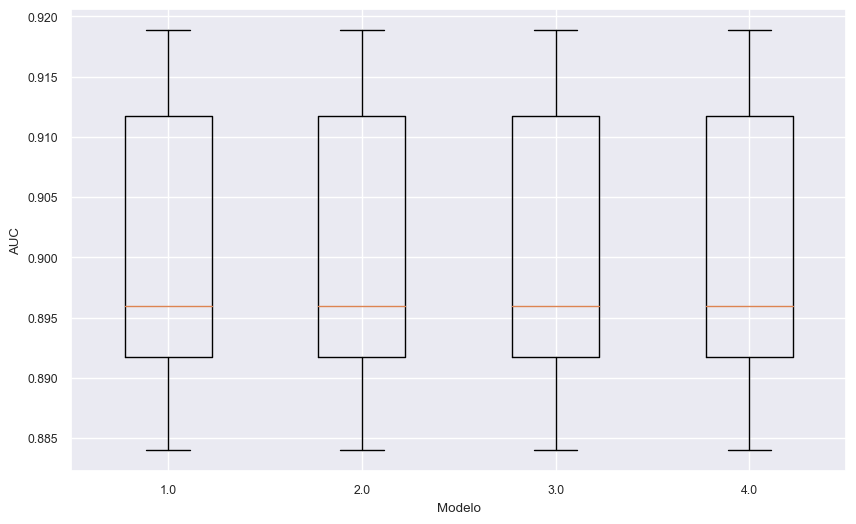

In [300]:
# Boxplot de la validacion cruzada 
plt.figure(figsize=(10, 6))  # Crea una figura de tamaño 10x6
plt.grid(True)  # Activa la cuadrícula en el gráficoç
# Agrupa los valores de AUC por modelo
grupo_metrica = results.groupby('Modelo')['AUC']
# Organiza los valores de R-squared por grupo en una lista
boxplot_data = [grupo_metrica.get_group(grupo).tolist() for grupo in grupo_metrica.groups]
# Crea un boxplot con los datos organizados
plt.boxplot(boxplot_data, labels=grupo_metrica.groups.keys())  # Etiqueta los grupos en el boxplot
# Etiqueta los ejes del gráfico
plt.xlabel('Modelo')  # Etiqueta del eje x
plt.ylabel('AUC')  # Etiqueta del eje y
plt.show()  # Muestra el gráfico  

In [301]:
# Calcular la media del AUC por modelo
media_AUC = results.groupby('Modelo')['AUC'].mean()
# Calcular la desviación estándar del AUC por modelo
std_AUC = results.groupby('Modelo')['AUC'].std()    
# Contar el número de parámetros en cada modelo
num_params = [len(modeloStepAIC['Modelo'].coef_[0]), len(modeloStepBIC['Modelo'].coef_[0]), 
 len(modeloStepAIC_trans['Modelo'].coef_[0]), len(modeloStepBIC_trans['Modelo'].coef_[0])]

In [302]:
media_AUC

Modelo
1.0    0.900455
2.0    0.900455
3.0    0.900462
4.0    0.900462
Name: AUC, dtype: float64

In [303]:
std_AUC

Modelo
1.0    0.012971
2.0    0.012971
3.0    0.012963
4.0    0.012963
Name: AUC, dtype: float64

In [304]:
num_params

[74, 74, 74, 74]

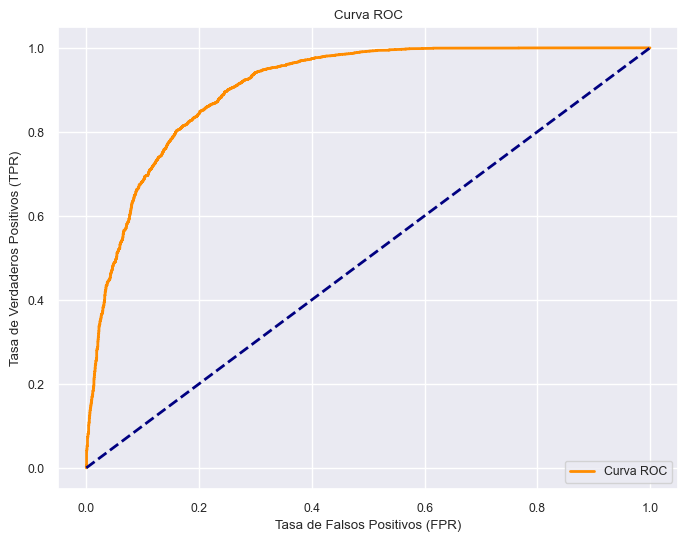

Área bajo la curva ROC = 0.9057727208566071


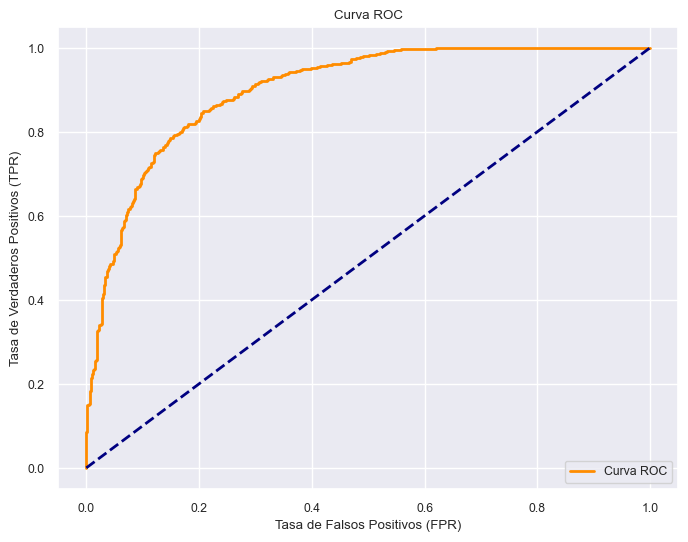

Área bajo la curva ROC = 0.9012383140433772


[0.9057727208566071, 0.9012383140433772]

In [305]:
fm.curva_roc(fm.crear_data_modelo(x_train,  modeloStepBIC['Variables']['cont'], modeloStepBIC['Variables']['categ'], modeloStepBIC['Variables']['inter']), y_train, modeloStepBIC)
fm.curva_roc(x_test_modeloStepBIC, y_test, modeloStepBIC)

In [306]:
# Inicializar un diccionario para almacenar las fórmulas y variables seleccionadas.
variables_seleccionadas = {
    'Formula': [],
    'Variables': [],
    'Interaccion': []
}

In [309]:
# Realizar 10 iteraciones de selección aleatoria. (en clase no se puede correr con 20)
for x in range(5):
    print('---------------------------- iter: ' + str(x))
    
    # Dividir los datos de entrenamiento en conjuntos de entrenamiento y prueba.
    x_train2, x_test2, y_train2, y_test2 = train_test_split(x_train, y_train, 
                                                            test_size = 0.2, random_state = 1234567 + x)
    
    # Realizar la selección stepwise utilizando el criterio BIC en la submuestra.
    modelo = fm.glm_stepwise(y_train2.astype(int), x_train2, var_cont, var_categ, [], 'BIC')
    
    # Almacenar las variables seleccionadas y la fórmula correspondiente.
    variables_seleccionadas['Variables'].append(modelo['Variables'])
    variables_seleccionadas['Formula'].append(sorted(modelo['X'].columns))
# Unir las variables en las fórmulas seleccionadas en una sola cadena.
variables_seleccionadas['Formula'] = list(map(lambda x: '+'.join(x), variables_seleccionadas['Formula']))
    
# Calcular la frecuencia de cada fórmula y ordenarlas por frecuencia.
frecuencias = Counter(variables_seleccionadas['Formula'])
frec_ordenada = pd.DataFrame(list(frecuencias.items()), columns = ['Formula', 'Frecuencia'])
frec_ordenada = frec_ordenada.sort_values('Frecuencia', ascending = False).reset_index()

# Identificar las tres fórmulas más frecuentes y las variables correspondientes.
var_1 = variables_seleccionadas['Variables'][variables_seleccionadas['Formula'].index(
    frec_ordenada['Formula'][0])]
var_2 = variables_seleccionadas['Variables'][variables_seleccionadas['Formula'].index(
    frec_ordenada['Formula'][1])]
var_3 = variables_seleccionadas['Variables'][variables_seleccionadas['Formula'].index(
    frec_ordenada['Formula'][2])]


---------------------------- iter: 0
Start: BIC = 6911.687031477857

y ~ 1

                        Variable         BIC
               + CodigoProvincia 3877.936096
                          + CCAA 3959.249543
              + Age_under19_Ptge 6406.435460
             + xAge_under19_Ptge 6406.435950
                + Age_over65_pct 6448.803464
               + xAge_over65_pct 6448.803998
             + xPersonasInmueble 6478.335911
              + PersonasInmueble 6478.339266
                  + Age_0-4_Ptge 6518.385184
                 + xAge_0-4_Ptge 6518.385512
                 + Age_19_65_pct 6701.281570
                + xAge_19_65_pct 6701.281775
                 + ActividadPpal 6792.387243
           + WomanPopulationPtge 6800.700593
          + xWomanPopulationPtge 6800.700706
      + SameComAutonDiffProvPtge 6805.935006
     + xSameComAutonDiffProvPtge 6805.935078
                    + Population 6823.132254
                   + xPopulation 6823.132316
                   + Tot

In [310]:
## Comparacion final, tomo el ganador de antes y los nuevos candidatos
results2 = pd.DataFrame({
    'Rsquared': []
    , 'Resample': []
    , 'Modelo': []
})
for rep in range(20):
    modelo1 = fm.validacion_cruzada_glm(
        5
        , x_train
        , y_train
        , modeloStepAIC_trans['Variables']['cont']
        , modeloStepAIC_trans['Variables']['categ']
        , modeloStepAIC_trans['Variables']['inter']
    )
    modelo2 = fm.validacion_cruzada_glm(
        5
        , x_train
        , y_train
        , var_1['cont']
        , var_1['categ']
        , var_1['inter']
    )
    modelo3 = fm.validacion_cruzada_glm(
        5
        , x_train
        , y_train
        , var_2['cont']
        , var_2['categ']
        , var_2['inter']
    )
    modelo4 = fm.validacion_cruzada_glm(
        5
        , x_train
        , y_train
        , var_3['cont']
        , var_3['categ']
        , var_3['inter']
    )
    results_rep = pd.DataFrame({
        'AUC': modelo1 + modelo2 + modelo3 + modelo4
        , 'Resample': ['Rep' + str((rep + 1))]*5*4
        , 'Modelo': [1]*5 + [2]*5 + [3]*5 + [4]*5
    })
    results2 = pd.concat([results2, results_rep], axis = 0)
     

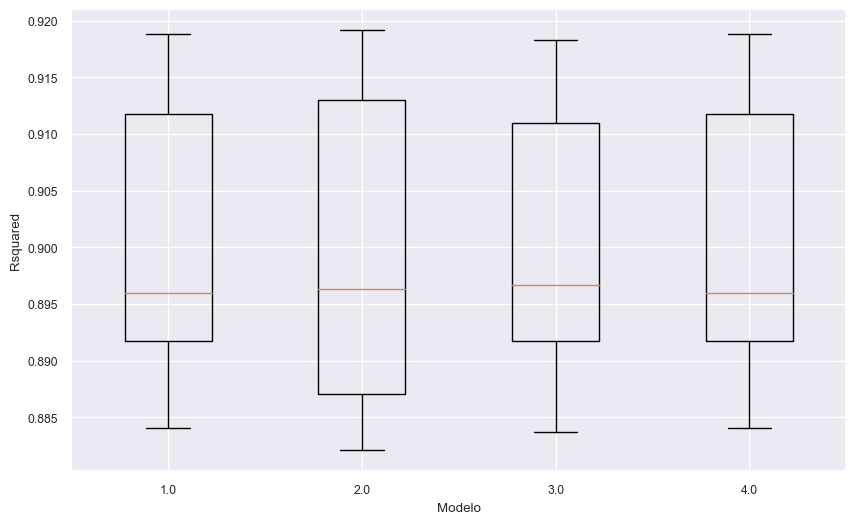

In [311]:
# Boxplot de la validacion cruzada 
plt.figure(figsize=(10, 6))  # Crea una figura de tamaño 10x6
plt.grid(True)  # Activa la cuadrícula en el gráficoç
# Agrupa los valores de Rsquared por modelo
grupo_metrica = results2.groupby('Modelo')['AUC']
# Organiza los valores de R-squared por grupo en una lista
boxplot_data = [grupo_metrica.get_group(grupo).tolist() for grupo in grupo_metrica.groups]
# Crea un boxplot con los datos organizados
plt.boxplot(boxplot_data, labels=grupo_metrica.groups.keys())  # Etiqueta los grupos en el boxplot
# Etiqueta los ejes del gráfico
plt.xlabel('Modelo')  # Etiqueta del eje x
plt.ylabel('Rsquared')  # Etiqueta del eje y
plt.show()  # Muestra el gráfico 

In [312]:
# Calcular la media de las métricas R-squared por modelo
media_AUC2= results.groupby('Modelo')['AUC'].mean()
# Calcular la desviación estándar de las métricas R-squared por modelo
std_AUC2 = results.groupby('Modelo')['AUC'].std()
# Contar el número de parámetros en cada modelo
num_params2 = [len(modeloStepAIC_trans['Modelo'].coef_[0]), 
                 len(frec_ordenada['Formula'][0].split('+')),
                 len(frec_ordenada['Formula'][1].split('+')), 
                 len(frec_ordenada['Formula'][2].split('+'))]

In [313]:
media_AUC2

Modelo
1.0    0.900455
2.0    0.900455
3.0    0.900462
4.0    0.900462
Name: AUC, dtype: float64

In [314]:
std_AUC2

Modelo
1.0    0.012971
2.0    0.012971
3.0    0.012963
4.0    0.012963
Name: AUC, dtype: float64

In [315]:
num_params2

[74, 94, 74, 74]

In [319]:
# Una vez decidido el mejor modelo, buscamos el mejor punto de corte 
ModeloGanador = modeloStepAIC_trans

In [321]:
## Buscamos el mejor punto de corte
# Probamos dos
fm.sensEspCorte(ModeloGanador['Modelo'], x_test, y_test, 0.4, ModeloGanador['Variables']['cont'], ModeloGanador['Variables']['categ'])

PtoCorte  Accuracy  Sensitivity  Specificity  PosPredValue  NegPredValue
0       0.4  0.826355     0.936191     0.648953      0.811582      0.862955

In [322]:
fm.sensEspCorte(ModeloGanador['Modelo'], x_test, y_test, 0.6, ModeloGanador['Variables']['cont'], ModeloGanador['Variables']['categ'])

PtoCorte  Accuracy  Sensitivity  Specificity  PosPredValue  NegPredValue
0       0.6  0.827586     0.871386     0.756844      0.852683      0.784641

In [341]:
# Generamos una rejilla de puntos de corte
posiblesCortes = np.arange(0, 1.01, 0.01).tolist()  # Generamos puntos de corte de 0 a 1 con intervalo de 0.01
rejilla = pd.DataFrame({
    'PtoCorte': [],
    'Accuracy': [],
    'Sensitivity': [],
    'Specificity': [],
    'PosPredValue': [],
    'NegPredValue': []
})  


In [342]:
# Creamos un DataFrame para almacenar las métricas para cada punto de corte

for pto_corte in posiblesCortes:  # Iteramos sobre los puntos de corte
    rejilla = pd.concat(
        [rejilla, fm.sensEspCorte(ModeloGanador['Modelo'], x_test, y_test, pto_corte, ModeloGanador['Variables']['cont'], ModeloGanador['Variables']['categ'])],
        axis=0
    )  # Calculamos las métricas para el punto de corte actual y lo agregamos al DataFrame

rejilla['Youden'] = rejilla['Sensitivity'] + rejilla['Specificity'] - 1  # Calculamos el índice de Youden
rejilla.index = list(range(len(rejilla)))  # Reindexamos el DataFrame para que los índices sean consecutivos

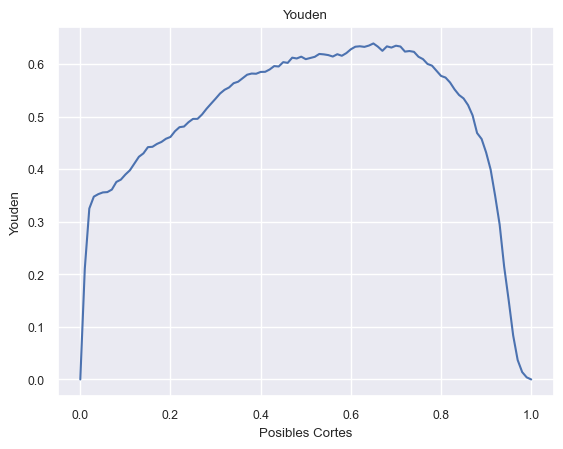

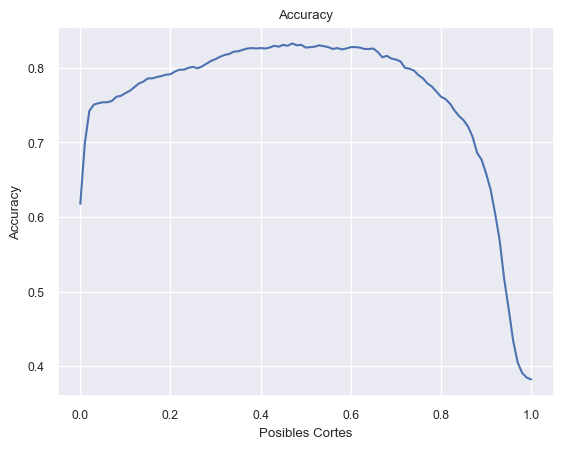

0.47000000000000003

In [343]:
plt.plot(rejilla['PtoCorte'], rejilla['Youden'])
plt.xlabel('Posibles Cortes')
plt.ylabel('Youden')
plt.title('Youden')
plt.show()

plt.plot(rejilla['PtoCorte'], rejilla['Accuracy'])
plt.xlabel('Posibles Cortes')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.show()

In [345]:
rejilla['PtoCorte'][rejilla['Youden'].idxmax()]

0.65

In [346]:
rejilla['PtoCorte'][rejilla['Accuracy'].idxmax()]

0.47000000000000003

In [344]:
fm.sensEspCorte(ModeloGanador['Modelo'], x_test, y_test, 0.47, ModeloGanador['Variables']['cont'], ModeloGanador['Variables']['categ'])

PtoCorte  Accuracy  Sensitivity  Specificity  PosPredValue  NegPredValue
0      0.47  0.832512     0.918245     0.694042      0.828983      0.840156

In [347]:
fm.sensEspCorte(ModeloGanador['Modelo'], x_test, y_test, 0.65, ModeloGanador['Variables']['cont'], ModeloGanador['Variables']['categ'])

PtoCorte  Accuracy  Sensitivity  Specificity  PosPredValue  NegPredValue
0      0.65  0.825739     0.845464     0.793881      0.868852      0.760802

In [349]:
# Vemos los coeficientes del modelo ganador
fm.summary_glm(ModeloGanador['Modelo'], y_train, ModeloGanador['X'])

{'Contrastes':                       Variable  Estimate    Std. Error       z value  \
 0                  (Intercept)  0.512328  1.858665e+06  2.756430e-07   
 1                Explotaciones  0.001069  2.174836e-04  4.916123e+00   
 2               xAge_19_65_pct -0.195385  4.480356e-02 -4.360933e+00   
 3              xForeignersPtge  0.209537  4.656888e-02  4.499507e+00   
 4              DifComAutonPtge -0.017845  5.384866e-03 -3.313958e+00   
 ..                         ...       ...           ...           ...   
 70                CCAA_Navarra -0.289603  8.275321e+07 -3.499603e-09   
 71              CCAA_PaísVasco -1.861936  1.858665e+06 -1.001760e-06   
 72                  CCAA_Rioja  1.082141           NaN           NaN   
 73          ActividadPpal_Otro  0.180964  1.056127e-01  1.713465e+00   
 74  ActividadPpal_ServConstInd  0.925905  1.916917e-01  4.830176e+00   
 
      p value signif  
 0   1.000000         
 1   0.000001    ***  
 2   0.000013    ***  
 3   0.000007   

In [351]:
# Evaluamos la estabilidad del modelo a partir de las diferencias en train y test
fm.pseudoR2(ModeloGanador['Modelo'], ModeloGanador['X'], y_train)

Optimization terminated successfully.
         Current function value: 0.663068
         Iterations 4


0.4648303412529655

In [353]:
x_test_ModeloGanador = fm.crear_data_modelo(x_test, ModeloGanador['Variables']['cont'],
                                         ModeloGanador['Variables']['categ'], ModeloGanador['Variables']['inter'])

In [355]:
fm.pseudoR2(ModeloGanador['Modelo'], x_test_ModeloGanador, y_test)

Optimization terminated successfully.
         Current function value: 0.665222
         Iterations 4


0.4438988157306286